# Machine Learning in Python - Project 1

Due Sunday, March 8th by 4 pm.

*Contributors: Scarlett Jiang, Jiaying Yang, Yaxin Liu, Chuanhao Li*

## Setup

*Install any packages here and load data*

In [1]:
# Add any additional libraries or submodules below
# Sklearn modules
import sklearn
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_regression
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Importing necessary libraries for the analysis
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson

import warnings

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

In [2]:
# Load data in easyshare.csv
d = pd.read_csv("easyshare.csv")
d.head()

mergeid  int_year  wave  country  country_mod  female        age  \
0  AT-000674-01    2011.0   4.0     11.0         40.0     1.0  59.700001   
1  AT-001215-01    2011.0   4.0     11.0         40.0     1.0  72.599998   
2  AT-001492-01    2011.0   4.0     11.0         40.0     1.0  59.599998   
3  AT-001492-02    2011.0   4.0     11.0         40.0     0.0  59.799999   
4  AT-001816-01    2004.0   1.0     11.0         40.0     1.0  61.299999   

   birth_country  citizenship  isced1997_r  ...  bmi2  smoking  ever_smoked  \
0           40.0         40.0          5.0  ...   2.0      5.0          5.0   
1          528.0        528.0          5.0  ...   3.0      1.0          1.0   
2           40.0         40.0          3.0  ...   2.0      5.0          1.0   
3           40.0         40.0          4.0  ...   2.0      1.0          1.0   
4           40.0         40.0          3.0  ...   2.0      5.0          1.0   

   br010_mod  br015_  casp  chronic_mod  sp008_  ch001_  cogscore  
0        5.0     1.0  44.0          1.0     5.0     2.0       8.0  
1        2.0     1.0  35.0          6.0     1.0     0.0      14.5  
2        7.0     2.0  43.0          1.0     5.0     6.0      18.5  
3        7.0     3.0  47.0          1.0     NaN     6.0      24.0  
4        4.0     3.0  43.0          0.0     5.0     2.0      20.0  

[5 rows x 23 columns]

# 1. Introduction

Dementia represents one of the most significant public health and social care challenges of the 21st century, affecting millions worldwide with projections showing a drastic increase in prevalence[1]. It is a complicated disease with numerous risk factors that span the life course, necessitating a comprehensive approach to prevention, management, and care. In addressing the global challenge of dementia, this report draws on the Lancet Commission on Dementia Prevention[2], Intervention, and Care's comprehensive analysis, as well as our data-driven exploration of the Survey of Health, Ageing, and Retirement in Europe (SHARE)[5].

We aim to offer actionable insights and practical recommendations for policymakers, healthcare providers, and communities to mitigate the impact of dementia. Our investigation employs machine learning techniques on the SHARE data, aiming to uncover modifiable risk factors that could significantly impact the prevention and delay of dementia onset.

Our research begins with the examination of data from the SHARE dataset. Initially, we perform data cleaning, utilizing KNN imputation to address missing values, ensuring the integrity and completeness of our dataset. Following this preparatory step, we embark on an exploratory data analysis (EDA), focusing on assessing correlations and examining the distribution of our study data. This critical phase allows us to understand the underlying patterns and relationships within the variables, guiding us towards effective feature engineering based on the structural relationships identified among the variables.

Building upon this foundation, our analysis proceeds in two distinct directions: regression and classification. In the regression analysis, we employ a variety of models, including linear, polynomial, and ridge regression, to predict continuous outcomes and understand the influence of various predictors on these outcomes. Simultaneously, our classification analysis focuses on dividing the cogscore into distinct categories, thereby allowing us to predict which group our test data falls into based on identified patterns within the dataset. Through these dual analytical approaches, our study seeks to uncover comprehensive insights into the data provided by the SHARE project, contributing to the broader understanding of the risk factors of dementia.


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98348 entries, 0 to 98347
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mergeid        97372 non-null  object 
 1   int_year       97372 non-null  float64
 2   wave           97372 non-null  float64
 3   country        97372 non-null  float64
 4   country_mod    97372 non-null  float64
 5   female         97372 non-null  float64
 6   age            97372 non-null  float64
 7   birth_country  97170 non-null  float64
 8   citizenship    97281 non-null  float64
 9   isced1997_r    97372 non-null  float64
 10  eduyears_mod   84532 non-null  float64
 11  eurod          95838 non-null  float64
 12  bmi            94686 non-null  float64
 13  bmi2           94686 non-null  float64
 14  smoking        96887 non-null  float64
 15  ever_smoked    97116 non-null  float64
 16  br010_mod      79210 non-null  float64
 17  br015_         97113 non-null  float64
 18  casp  

The first variable, mergeid, is a unique identifier for each participant, which is in the type of object. Since it is not useful for our analysis and can be dropped.

In [4]:
# Drop the mergeid column
new_d = d.iloc[:, 1:]

In [5]:
# Generate descriptive statistics for numerical variables
descriptive_stats = new_d.describe()

In [6]:
# Output the descriptive statistics
descriptive_stats

int_year          wave       country   country_mod        female  \
count  97372.000000  97372.000000  97372.000000  97372.000000  97372.000000   
mean    2010.467537      3.794612     24.272080    384.954135      0.541480   
std        4.632490      2.146070     12.298221    229.261059      0.498279   
min     2004.000000      1.000000     11.000000     40.000000      0.000000   
25%     2006.000000      2.000000     15.000000    208.000000      0.000000   
50%     2011.000000      4.000000     20.000000    300.000000      1.000000   
75%     2013.000000      5.000000     31.000000    616.000000      1.000000   
max     2020.000000      8.000000     63.000000    756.000000      1.000000   

                age  birth_country   citizenship   isced1997_r  eduyears_mod  \
count  97372.000000   97170.000000  97281.000000  97372.000000  84532.000000   
mean      67.938640     398.304456    391.759830      2.658916     10.427832   
std        8.864202     237.542164    232.965078      1.493547      4.264231   
min       55.099998       2.000000      4.000000      0.000000      0.000000   
25%       60.500000     208.000000    208.000000      1.000000      8.000000   
50%       66.599998     348.000000    348.000000      3.000000     11.000000   
75%       74.199997     642.000000    620.000000      3.000000     13.000000   
max      111.599998    1101.000000   1132.000000      6.000000     30.000000   

       ...          bmi2       smoking   ever_smoked     br010_mod  \
count  ...  94686.000000  96887.000000  97116.000000  79210.000000   
mean   ...      2.849788      4.341790      3.255282      3.345916   
std    ...      0.762833      1.483112      1.983651      2.244878   
min    ...      1.000000      1.000000      1.000000      1.000000   
25%    ...      2.000000      5.000000      1.000000      1.000000   
50%    ...      3.000000      5.000000      5.000000      3.000000   
75%    ...      3.000000      5.000000      5.000000      5.000000   
max    ...      4.000000      5.000000      5.000000      7.000000   

             br015_          casp   chronic_mod        sp008_        ch001_  \
count  97113.000000  84065.000000  97283.000000  83175.000000  96928.000000   
mean       2.672248     36.744008      1.305922      3.978635      2.173335   
std        1.325228      6.463052      1.269872      1.744222      1.403437   
min        1.000000     12.000000      0.000000      1.000000      0.000000   
25%        1.000000     32.000000      0.000000      1.000000      1.000000   
50%        3.000000     37.000000      1.000000      5.000000      2.000000   
75%        4.000000     42.000000      2.000000      5.000000      3.000000   
max        4.000000     48.000000      9.000000      5.000000     17.000000   

           cogscore  
count  97372.000000  
mean      11.973714  
std        4.184386  
min        0.000000  
25%        9.000000  
50%       12.000000  
75%       15.000000  
max       26.000000  

[8 rows x 22 columns]

# 2. Exploratory Data Analysis and Feature Engineering

### 2.1 Fill in Missing Values with KNN Imputation

In [7]:
# Check for missing values
missing_values = new_d.isnull().sum()

# Output the results
missing_values

int_year           976
wave               976
country            976
country_mod        976
female             976
age                976
birth_country     1178
citizenship       1067
isced1997_r        976
eduyears_mod     13816
eurod             2510
bmi               3662
bmi2              3662
smoking           1461
ever_smoked       1232
br010_mod        19138
br015_            1235
casp             14283
chronic_mod       1065
sp008_           15173
ch001_            1420
cogscore           976
dtype: int64

Here we can see that there are missing values in the dataset. We will use KNN imputation to fill in the missing values with the mean value from the 5 nearest neighbors found in the training set.

In data preprocessing, K-Nearest Neighbors (KNN) imputation is a widely used technique for filling missing values. This method predicts missing entries by averaging the values of the nearest K neighbors, with each neighbor contributing equally to the imputed value. The code snippet shows the initialization of a KNN imputer for five neighbors with uniform weights, the fitting of this imputer to the dataset, and the transformation of the dataset to fill in gaps. The imputed data is then cast back into a Pandas DataFrame, making it ready for further analysis. The efficacy of imputation is verified by checking for missing values in the DataFrame using isnull().sum(), ensuring the dataset’s completeness for subsequent analysis.

In [8]:
# Initialize the KNN Imputer
imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Fit the imputer to your data and transform it
# This will fill missing values based on the mean value from n_neighbors nearest neighbors found in the training set
d_imputed = imputer.fit_transform(new_d)

# d_imputed is a NumPy array. Convert it back to a DataFrame if you need
df = pd.DataFrame(d_imputed, columns=new_d.columns)

In [9]:
# Check for missing values of the imputed DataFrame
missing_values_imputed = df.isnull().sum()

# Output the results
missing_values_imputed

int_year         0
wave             0
country          0
country_mod      0
female           0
age              0
birth_country    0
citizenship      0
isced1997_r      0
eduyears_mod     0
eurod            0
bmi              0
bmi2             0
smoking          0
ever_smoked      0
br010_mod        0
br015_           0
casp             0
chronic_mod      0
sp008_           0
ch001_           0
cogscore         0
dtype: int64

### 2.2 Exploratory Data Analysis

In [10]:
# Check the data types of the imputed DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98348 entries, 0 to 98347
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   int_year       98348 non-null  float64
 1   wave           98348 non-null  float64
 2   country        98348 non-null  float64
 3   country_mod    98348 non-null  float64
 4   female         98348 non-null  float64
 5   age            98348 non-null  float64
 6   birth_country  98348 non-null  float64
 7   citizenship    98348 non-null  float64
 8   isced1997_r    98348 non-null  float64
 9   eduyears_mod   98348 non-null  float64
 10  eurod          98348 non-null  float64
 11  bmi            98348 non-null  float64
 12  bmi2           98348 non-null  float64
 13  smoking        98348 non-null  float64
 14  ever_smoked    98348 non-null  float64
 15  br010_mod      98348 non-null  float64
 16  br015_         98348 non-null  float64
 17  casp           98348 non-null  float64
 18  chroni

In [11]:
# Select integer columns
excluded_columns = ['age', 'bmi', 'cogscore']
int_features = [col for col in df.columns if col not in excluded_columns]

# Round the integer features to the nearest whole number
df[int_features] = df[int_features].round(0)

# Display the first few rows of the new data
df.head(5)

int_year  wave  country  country_mod  female        age  birth_country  \
0    2011.0   4.0     11.0         40.0     1.0  59.700001           40.0   
1    2011.0   4.0     11.0         40.0     1.0  72.599998          528.0   
2    2011.0   4.0     11.0         40.0     1.0  59.599998           40.0   
3    2011.0   4.0     11.0         40.0     0.0  59.799999           40.0   
4    2004.0   1.0     11.0         40.0     1.0  61.299999           40.0   

   citizenship  isced1997_r  eduyears_mod  ...  bmi2  smoking  ever_smoked  \
0         40.0          5.0           3.0  ...   2.0      5.0          5.0   
1        528.0          5.0          15.0  ...   3.0      1.0          1.0   
2         40.0          3.0          11.0  ...   2.0      5.0          1.0   
3         40.0          4.0          13.0  ...   2.0      1.0          1.0   
4         40.0          3.0          12.0  ...   2.0      5.0          1.0   

   br010_mod  br015_  casp  chronic_mod  sp008_  ch001_  cogscore  
0        5.0     1.0  44.0          1.0     5.0     2.0       8.0  
1        2.0     1.0  35.0          6.0     1.0     0.0      14.5  
2        7.0     2.0  43.0          1.0     5.0     6.0      18.5  
3        7.0     3.0  47.0          1.0     3.0     6.0      24.0  
4        4.0     3.0  43.0          0.0     5.0     2.0      20.0  

[5 rows x 22 columns]

This code segment is intended to correct the data by rounding originally integer-valued columns, excluding specified ones, back to whole numbers.

In [12]:
# Generate descriptive statistics for numerical variables in the imputed DataFrame
descriptive_stats_new = df.describe()

In [13]:
# Output the descriptive statistics
descriptive_stats_new

int_year          wave       country   country_mod        female  \
count  98348.000000  98348.000000  98348.000000  98348.000000  98348.000000   
mean    2010.462897      3.796651     24.269380    384.954590      0.546030   
std        4.609679      2.135492     12.237074    228.120624      0.497879   
min     2004.000000      1.000000     11.000000     40.000000      0.000000   
25%     2006.000000      2.000000     15.000000    208.000000      0.000000   
50%     2011.000000      4.000000     20.000000    348.000000      1.000000   
75%     2013.000000      5.000000     31.000000    616.000000      1.000000   
max     2020.000000      8.000000     63.000000    756.000000      1.000000   

                age  birth_country   citizenship   isced1997_r  eduyears_mod  \
count  98348.000000   98348.000000  98348.000000  98348.000000  98348.000000   
mean      67.938640     398.470747    391.846525      2.662301     10.353947   
std        8.820107     236.258337    231.801363      1.486502      4.101138   
min       55.099998       2.000000      4.000000      0.000000      0.000000   
25%       60.599998     208.000000    208.000000      1.000000      8.000000   
50%       66.699997     348.000000    348.000000      3.000000     11.000000   
75%       74.000000     620.000000    620.000000      3.000000     13.000000   
max      111.599998    1101.000000   1132.000000      6.000000     30.000000   

       ...          bmi2       smoking   ever_smoked     br010_mod  \
count  ...  98348.000000  98348.000000  98348.000000  98348.000000   
mean   ...      2.851873      4.337445      3.253193      3.310835   
std    ...      0.752368      1.473980      1.971861      2.085252   
min    ...      1.000000      1.000000      1.000000      1.000000   
25%    ...      2.000000      5.000000      1.000000      1.000000   
50%    ...      3.000000      5.000000      5.000000      3.000000   
75%    ...      3.000000      5.000000      5.000000      5.000000   
max    ...      4.000000      5.000000      5.000000      7.000000   

             br015_          casp   chronic_mod        sp008_        ch001_  \
count  98348.000000  98348.000000  98348.000000  98348.000000  98348.000000   
mean       2.676658     36.652845      1.302985      3.961789      2.171503   
std        1.318196      6.175623      1.263594      1.640720      1.394375   
min        1.000000     12.000000      0.000000      1.000000      0.000000   
25%        1.000000     33.000000      0.000000      3.000000      1.000000   
50%        3.000000     37.000000      1.000000      5.000000      2.000000   
75%        4.000000     41.000000      2.000000      5.000000      3.000000   
max        4.000000     48.000000      9.000000      5.000000     17.000000   

           cogscore  
count  98348.000000  
mean      11.973714  
std        4.163572  
min        0.000000  
25%        9.000000  
50%       12.000000  
75%       15.000000  
max       26.000000  

[8 rows x 22 columns]

This outcome suggests that the chosen method for handling missing data was both appropriate and effective, preserving the dataset's original patterns and insights without introducing significant biases or distortions.

In [14]:
# Draw a pairplot of the numerical variables in the imputed DataFrame
sns.pairplot(df)

Upon reviewing the pairplot, it is evident that `int_year` and `wave` are correlated, as seen by a visible pattern in their scatterplot. However, other variables in the dataset do not exhibit such clear relationships, with the scatterplots showing a broad and dispersed distribution of data points, suggesting no immediate linear correlations.

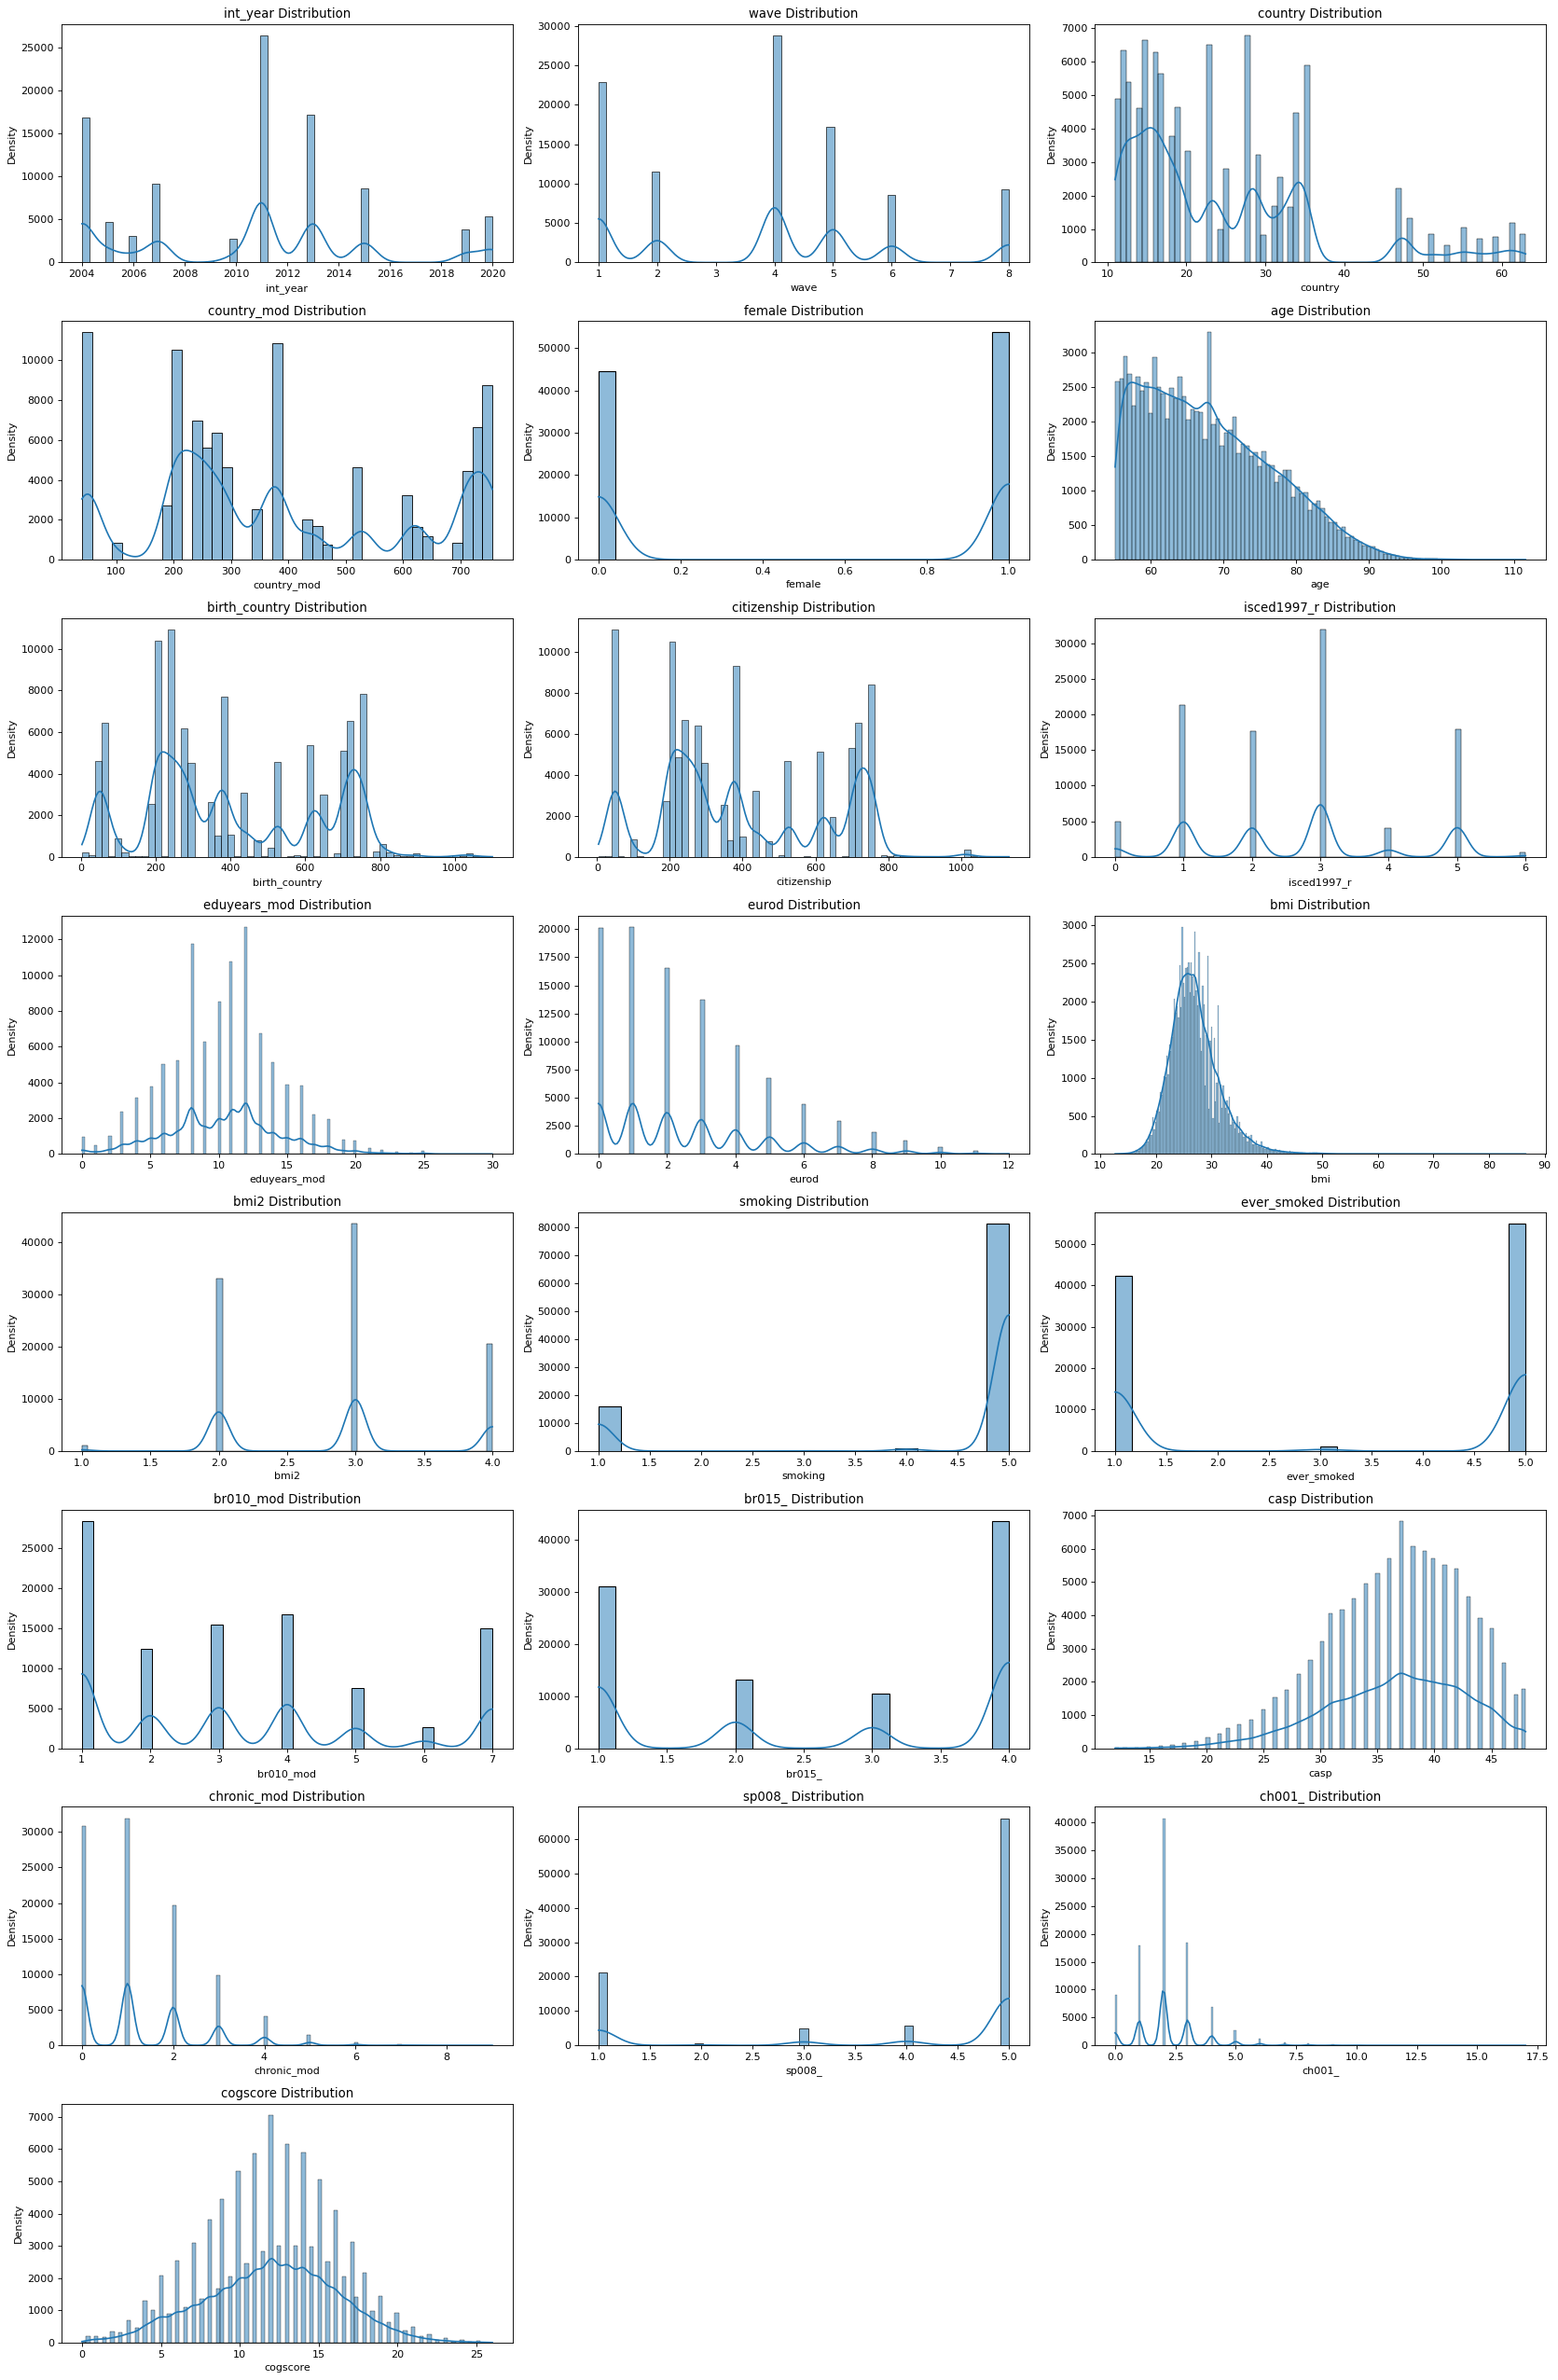

In [15]:
# Select numerical columns
num_cols = df.columns
num_plots = len(num_cols)
cols = 3  # Define the number of columns in subplot grid
rows = num_plots // cols + (num_plots % cols > 0)  # Calculate the required number of rows

# Plot the histograms of the numerical columns
plt.figure(figsize=(7 * cols, 4 * rows))  # Adjust the overall size of the subplot grid

for i, column in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[column], kde=True)  # Using histplot instead of distplot
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

The dataset features variables with right-skewed distributions, such as `age`, `ch001_`, `casp`, `bmi`,`eurod` and `chronic_mod`, signifying most values are low with fewer high-value outliers. Such skewness hints at broader demographic and health trends, which could influence policy and resource distribution. To align with many statistical methods requiring normally distributed data, transformations like logarithmic, square root, or inverse are often applied to right-skewed data. These transformations can normalize distributions, making them suitable for analyses and enabling more accurate interpretations. Integrating these steps is crucial, as they affect both the analysis approach and the actionable insights derived from the data, especially in tailoring interventions and policies.

### 2.3 Feature Engineering

##### 2.3.1 Logarithm transformation to skewed features

In [16]:
# Introduce log transformation to certain features
df['log_age'] = np.log(df['age'] + 1)  # Apply log transformation to 'age'
df['log_bmi'] = np.log(df['bmi'] + 1)  # Apply log transformation to 'bmi'
df['log_ch001_'] = np.log(df['ch001_'] + 1)  # Apply log transformation to 'ch001_'
df['log_chronic_mod'] = np.log(df['chronic_mod'] + 1)  # Apply log transformation to 'chronic_mod'
df['log_eurod'] = np.log(df['eurod'] + 1)  # Apply log transformation to 'eurod'
df['log_casp'] = np.log(df['casp'] + 1)  # Apply log transformation to 'casp'

# Now, the DataFrame 'df' contains both the original and the log-transformed columns.
# Displaying the head of the DataFrame to verify the log-transformed columns
df[['log_age', 'log_bmi', 'log_ch001_', 'log_chronic_mod', 'log_eurod', 'log_casp']].head()

log_age   log_bmi  log_ch001_  log_chronic_mod  log_eurod  log_casp
0  4.105944  3.219828    1.098612         0.693147   0.693147  3.806662
1  4.298645  3.403393    0.000000         1.945910   1.386294  3.583519
2  4.104295  3.109549    1.945910         0.693147   1.098612  3.784190
3  4.107590  3.186283    1.945910         0.693147   0.693147  3.871201
4  4.131961  3.207726    1.098612         0.000000   1.098612  3.784190

##### 2.3.2 OneHotEncoding to `country`

The values of variable `country` do not have numerical meaning, and instead it is an objective classification. Hence, it is critical to use OneHotEncoding to transform this feature.

In [17]:
# Copy the original dataframe to preserve the 'country' column
df_original = df.copy()

# Perform one-hot encoding on the 'country' column
df_encoded = pd.get_dummies(df, columns=['country'], prefix='country', dtype=int)

# Create the new dataframe by joining the one-hot encoded columns to the original dataframe
df = df_original.join(df_encoded[df_encoded.columns.difference(df_original.columns)])

# Display the first few rows of the new dataframe to verify the encoding
df.head()

int_year  wave  country  country_mod  female        age  birth_country  \
0    2011.0   4.0     11.0         40.0     1.0  59.700001           40.0   
1    2011.0   4.0     11.0         40.0     1.0  72.599998          528.0   
2    2011.0   4.0     11.0         40.0     1.0  59.599998           40.0   
3    2011.0   4.0     11.0         40.0     0.0  59.799999           40.0   
4    2004.0   1.0     11.0         40.0     1.0  61.299999           40.0   

   citizenship  isced1997_r  eduyears_mod  ...  country_35.0  country_47.0  \
0         40.0          5.0           3.0  ...             0             0   
1        528.0          5.0          15.0  ...             0             0   
2         40.0          3.0          11.0  ...             0             0   
3         40.0          4.0          13.0  ...             0             0   
4         40.0          3.0          12.0  ...             0             0   

   country_48.0  country_51.0  country_53.0  country_55.0  country_57.0  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   country_59.0  country_61.0  country_63.0  
0             0             0             0  
1             0             0             0  
2             0             0             0  
3             0             0             0  
4             0             0             0  

[5 rows x 58 columns]

In [18]:
# split the column names of original features, target and added features
original_features= ['int_year','wave','country','country_mod','female','age','birth_country','citizenship',
                    'isced1997_r','eduyears_mod','eurod','bmi','bmi2','smoking','ever_smoked',
                    'br010_mod','br015_','casp','chronic_mod','sp008_','ch001_'
                    ]
target = ['cogscore']
added_features= ['country_11.0','country_12.0','country_13.0','country_14.0','country_15.0',
                    'country_16.0','country_17.0','country_18.0','country_19.0','country_20.0',
                    'country_23.0','country_24.272080269481982','country_25.0','country_28.0',
                    'country_29.0','country_30.0','country_31.0','country_32.0','country_33.0',
                    'country_34.0','country_35.0','country_47.0','country_48.0','country_51.0',
                    'country_53.0','country_55.0','country_57.0','country_59.0','country_61.0',
                    'country_63.0','log_age', 'log_bmi', 'log_ch001_', 'log_chronic_mod', 
                    'log_eurod', 'log_casp'
                 ]


### 2.4 Train-Test Split

In [19]:
# Create Train and Test Data Frames
X_inall = df.drop(['cogscore'], axis=1)  # Features
y = df['cogscore']  # Target

# Split the data into training and testing sets
# 80% of the data will be used for training and 20% for testing
# Fix the random state = 42 for reproducibility 
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_inall, y, test_size=0.2, random_state=42)

### 2.5 Finding the Best Features for Predicting Cognitive Scores

In the pursuit of identifying the key predictors for cognitive scores, consider employing the following methodologies:

1. **Correlation Analysis**: Initiate by conducting a correlation analysis to pinpoint features with the most substantial correlations to cognitive scores.

2. **Feature Importance**: Deploy machine learning algorithms such as decision trees or ensemble methods like Random Forest, which can elucidate the importance scores of various features.

3. **Univariate Selection**: Engage in statistical testing to select individual features that demonstrate a potent relationship with the cognitive scores.

4. **OLS Regression Test**: Identified significant features by selecting those with a p-value less than or equal to 0.05
.
The application of these systematic methods is critical in refining the predictive model for cognitive scores.


##### 2.5.1 Correlation Analysis

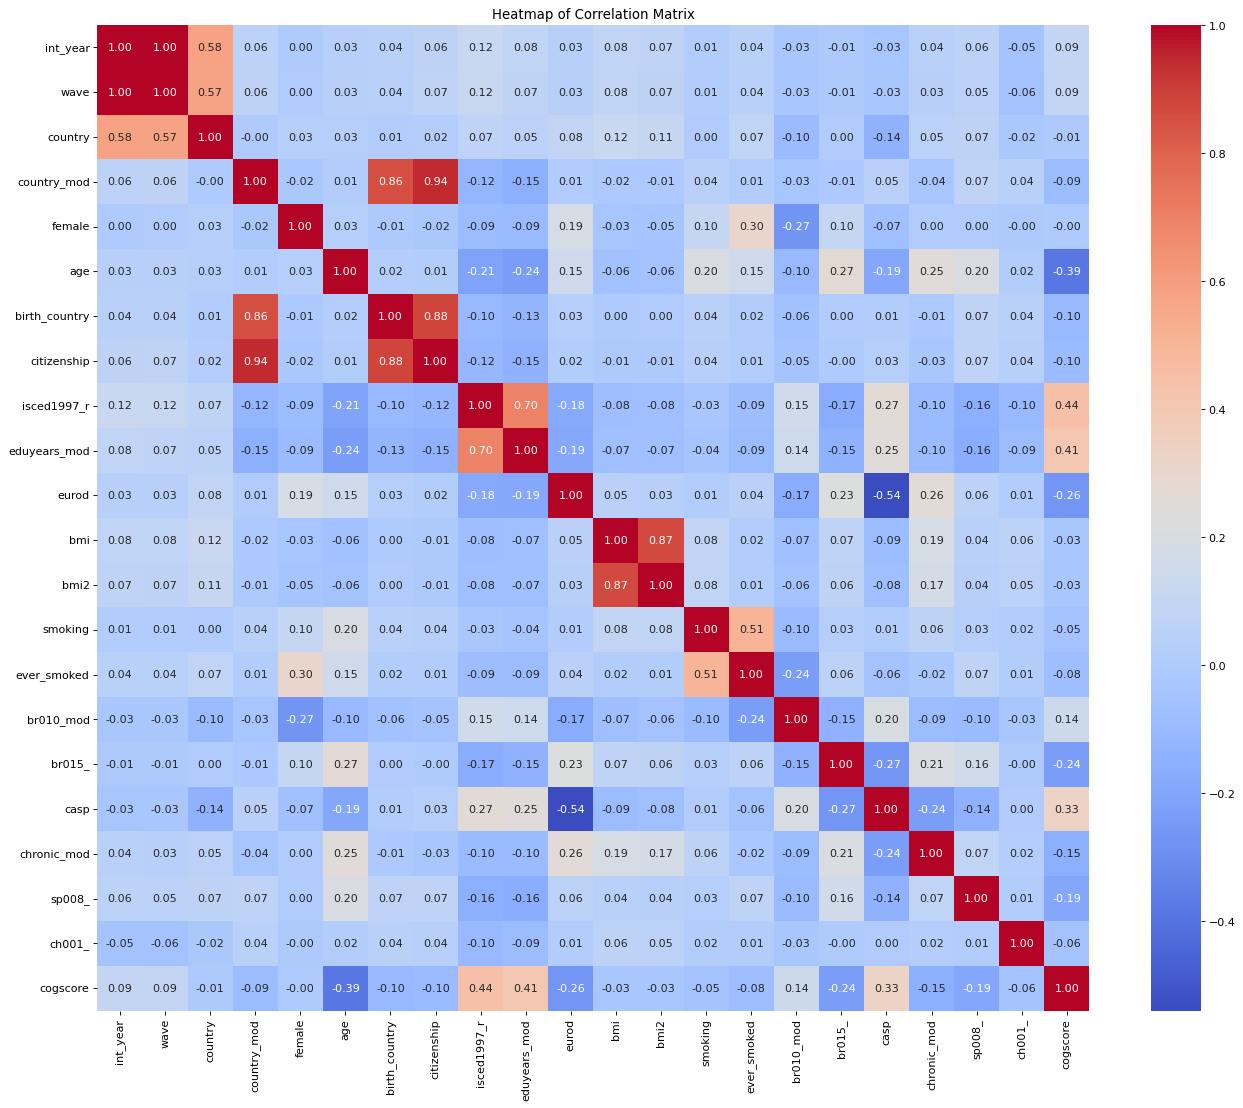

In [20]:
# Find the correlation matrix of the imputed DataFrame
df_subset = df.iloc[:, :22]

corr = df_subset.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

From the heatmap we can see that the variable `cogscore` shows varying degrees of correlation with several other factors. It seems to have a moderate positive correlation with `educyears_mod`, `isced1997_r` and `casp` show a positive correlation with `cogscore`. This suggests that: more years of education (`educyears_mod`) and higher educational attainment (`isced1997_r`) are associated with higher cognitive scores. This may reflect the cognitive reserve hypothesis, where education may contribute to the resilience of the brain to neuropathological damage[1]. The `casp` variable, which often measures quality of life or well-being, is positively correlated with cognitive scores, possibly indicating that a higher quality of life is associated with better cognitive function. Conversely, `cogscore` appears to have a moderate negative correlation with `age`, suggesting that older people tend to have lower cognitive scores. Weak correlations are observed with other variables such as `bmi`, `smoking` and `female`, suggesting that these factors may have less direct effect on cognitive scores. It's important to note that correlation does not imply causation and further analysis would be needed to draw more definitive conclusions.

##### 2.5.2 Feature Importance

Random Forest is an ensemble machine learning algorithm that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random forests correct for decision trees' habit of overfitting to their training set. It's well-suited for a wide range of data problems and is robust against overfitting. The "random" part comes from the fact that it uses a random subset of features to split nodes in each decision tree, providing a diverse set of trees for the final prediction. The feature importance scores from a Random Forest model can be used to identify the most important features for predicting cognitive scores.

In [21]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train_all, y_train_all)

# Predict on the test data
y_pred = rf.predict(X_test_all)

# Calculate the performance using an appropriate regression metric, such as Mean Squared Error (MSE)
mse = mean_squared_error(y_test_all, y_pred)
print(f"Mean Squared Error: {mse}")

# Get feature importances
importances = rf.feature_importances_

# Convert the importances into a DataFrame
feature_importance_df = pd.DataFrame({'feature': X_inall.columns, 'importance': importances})

# Sort the DataFrame to find the most important features
feature_importance_df.sort_values('importance', ascending=False, inplace=True)
print(feature_importance_df.head(10))

Mean Squared Error: 10.733970094767772
          feature  importance
8     isced1997_r    0.177723
5             age    0.091321
21        log_age    0.090802
9    eduyears_mod    0.068680
22        log_bmi    0.050577
11            bmi    0.050225
17           casp    0.042538
26       log_casp    0.041199
15      br010_mod    0.032160
6   birth_country    0.025757


In [22]:
# Convert the importances into a DataFrame
feature_importance_df = pd.DataFrame({'feature': X_inall.columns, 'importance': importances})

# Sort the DataFrame to find the most important features
feature_importance_df.sort_values('importance', ascending=False, inplace=True)

# Select and print the feature names of the top 14 most important features
top_14_feature_names = feature_importance_df.head(14)['feature']
print(top_14_feature_names.tolist())

['isced1997_r', 'age', 'log_age', 'eduyears_mod', 'log_bmi', 'bmi', 'casp', 'log_casp', 'br010_mod', 'birth_country', 'country', 'eurod', 'log_eurod', 'int_year']


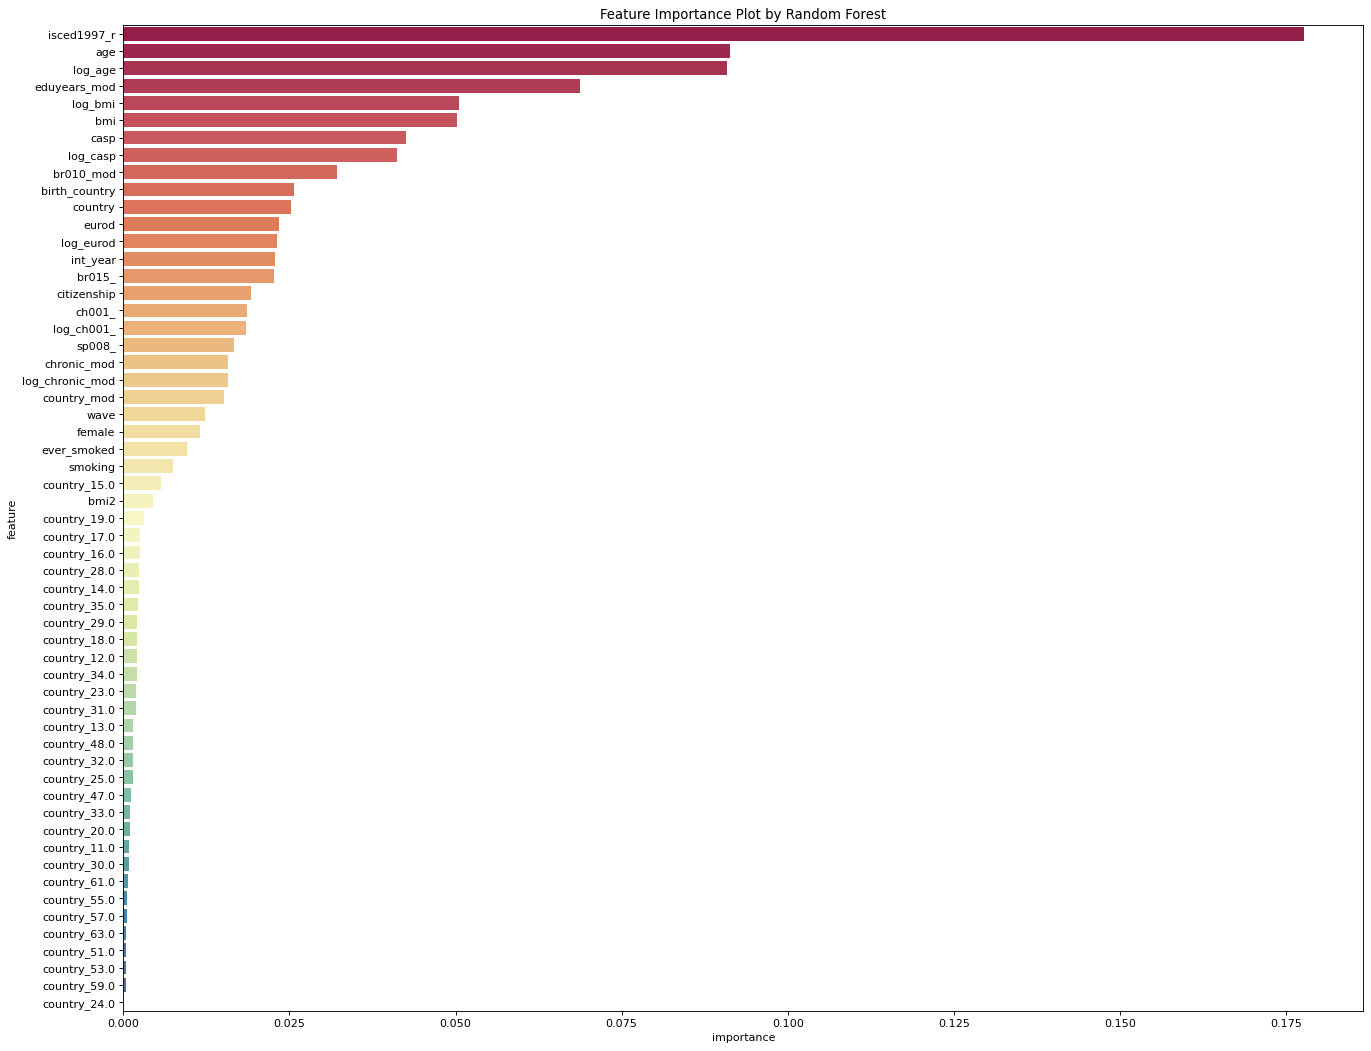

In [23]:
# Plot the feature importances
with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
    plt.figure(figsize=(20, 16))
    sns.barplot(x='importance', y='feature', data=feature_importance_df, palette="Spectral")
    plt.title('Feature Importance Plot by Random Forest')
    plt.show()

The Random Forest model has been employed to discern the most pertinent features that influence the target variable. Within this model, `isced1997_r` emerges as the paramount feature, indicating a potentially strong impact on the target variable. This might reflect the educational level or a related aspect. Following closely, `age` is identified as the second most crucial feature, suggesting that the target variable is indeed affected by the age of the subjects in the study.

Subsequent to these, `log_age` and `eduyears_mod` are also important, albeit with a substantial drop in importance compared to `age`, hinting at a less pronounced but still notable effect on the model's output. The remaining features manifest with diminishing importance scores, suggesting that while they do contribute to the predictions, their impact is comparatively limited. This tiered hierarchy of feature importance underscores the model's reliance on a select set of features to drive its predictive power, combining these key indicators to form a nuanced understanding of the target variable.

If the importance of a variable and its logarithmic (log) transformation are closely matched, we generally opt to retain only the one with greater importance. For example, if the importance of `age` and `log_age` is very close, we should keep only the one with the higher importance. By doing this, we can reduce the number of variables in our model, avoid redundancy, and potentially improve the model's interpretability and performance. In short, choosing the variable with higher importance helps to maintain model simplicity while capturing the most critical information.

##### 2.5.3 Univariate Selection

Univariate Selection in the context of feature selection refers to methods that evaluate each feature individually to determine the strength of the relationship of the feature with the response variable. These methods are simple to run and understand and are generally based on univariate statistical tests. For example, this can include techniques like chi-squared tests, ANOVA, or correlation coefficients, depending on whether the features are categorical or continuous. The key idea is to select those features that have the strongest relationship with the output variable. The selected features are often used as input to machine learning models. In the context of regression problems, the f_regression method from scikit-learn's feature_selection module can be used to select the best features based on univariate statistical tests.

In [24]:
# Select top k features based on their relationship with the target variable
# f_regression is used here since we're dealing with a regression problem
selector = SelectKBest(score_func=f_regression, k='all')  # Use k='all' to select all features, or replace with desired number

# Fit to the data and transform it
X_new = selector.fit_transform(X_inall, y)

# Get the scores of the features
scores = selector.scores_

# Create a DataFrame of features and their corresponding scores
features_scores = pd.DataFrame({'Feature': X_inall.columns, 'Score': scores})

# Sort the features by their scores in descending order
features_scores_sorted = features_scores.sort_values(by='Score', ascending=False)

print(features_scores_sorted)

            Feature         Score
8       isced1997_r  23738.585462
9      eduyears_mod  19445.448609
5               age  17242.630013
21          log_age  16762.034958
17             casp  11750.857965
26         log_casp  11555.582141
10            eurod   7411.489210
25        log_eurod   6398.340603
16           br015_   5866.260407
19           sp008_   3878.748852
31     country_15.0   3553.109734
24  log_chronic_mod   2431.309019
18      chronic_mod   2412.039882
15        br010_mod   1915.614813
6     birth_country   1008.938679
7       citizenship    947.205070
1              wave    876.320980
0          int_year    850.530679
3       country_mod    817.088462
32     country_16.0    662.235729
14      ever_smoked    642.538058
27     country_11.0    575.610739
36     country_20.0    548.691536
41     country_29.0    410.496963
28     country_12.0    397.708261
34     country_18.0    391.956784
29     country_13.0    345.697780
20           ch001_    313.978025
30     country

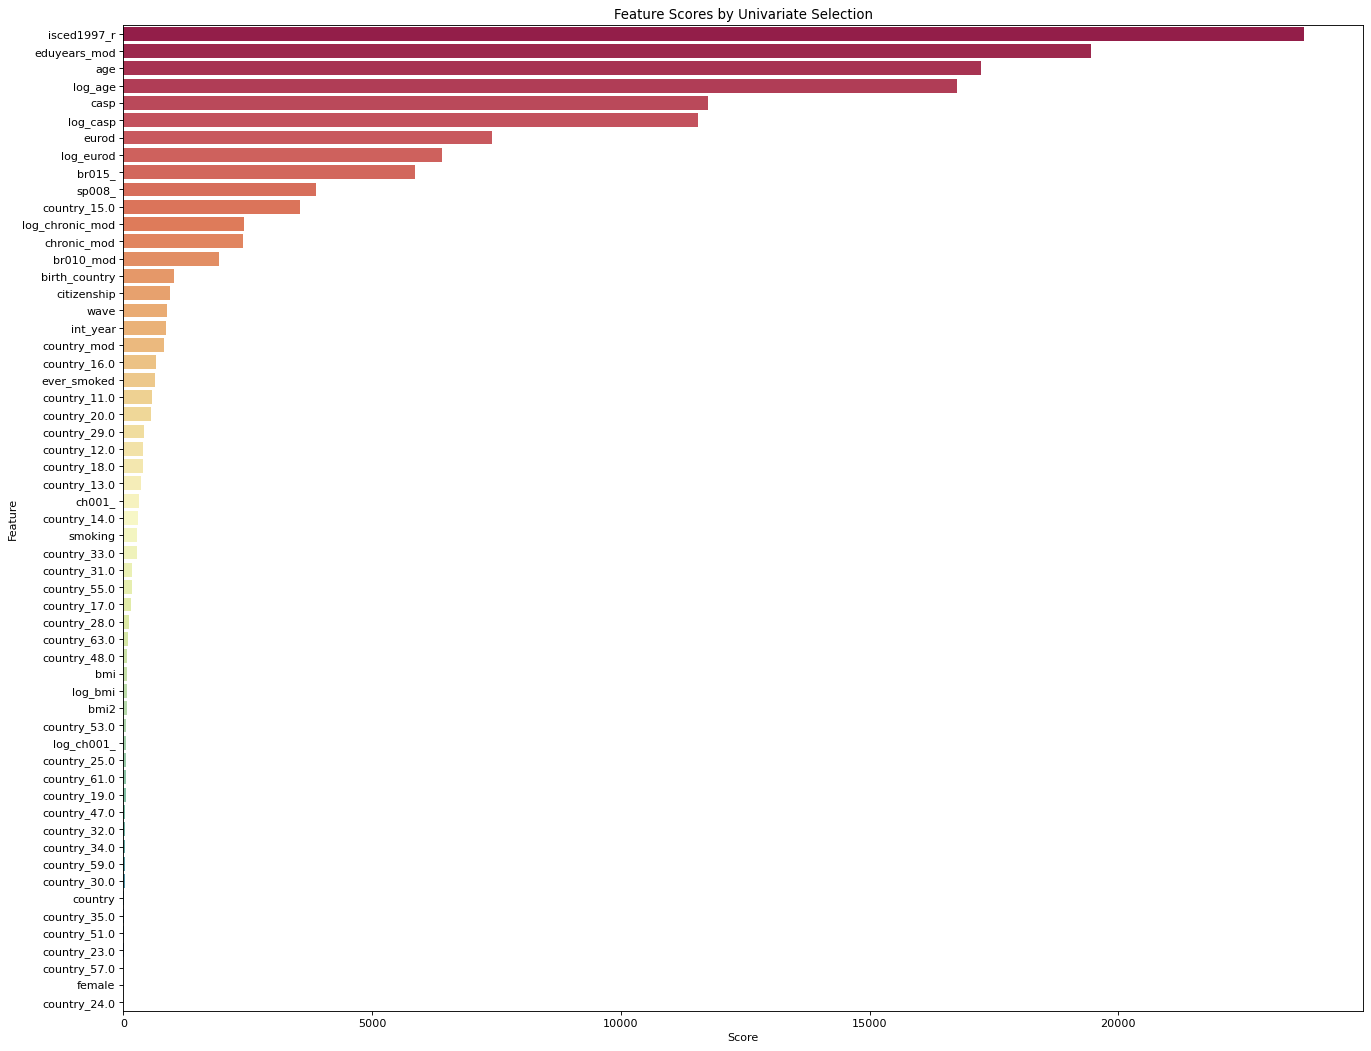

In [25]:
# Plot the feature scores
with warnings.catch_warnings():
    warnings.simplefilter("ignore", FutureWarning)
    plt.figure(figsize=(20, 16))
    sns.barplot(x ='Score', y = 'Feature', data=features_scores_sorted, palette="Spectral")
    plt.title('Feature Scores by Univariate Selection')
    plt.show()

In [26]:
# Select the top 14 feature names based on their scores
top_14_feature_names = features_scores_sorted.head(14)['Feature']

# Print the top 14 feature names
print(top_14_feature_names.tolist())

['isced1997_r', 'eduyears_mod', 'age', 'log_age', 'casp', 'log_casp', 'eurod', 'log_eurod', 'br015_', 'sp008_', 'country_15.0', 'log_chronic_mod', 'chronic_mod', 'br010_mod']


The output is a ranked list of features based on their importance in predicting the target variable in a regression model. The 'Score' column represents the statistical significance of each feature with respect to the target. Higher scores indicate a stronger relationship. For instance, `ised1997_r` has the highest score, suggesting it's the most predictive feature. This ordered list helps in identifying which features contribute the most to the model, allowing for a focused selection of features for model training to potentially improve performance and interpretability.
we observe that `isced1997_r` and `eduyears_mod` have received the highest scores, signifying their strong linear relationship with the target. `age`, `log_age`, and `casp` follow suit with notably high scores, but there's a visible gap between the top two features and the rest, indicating a more pronounced effect on the target variable by these features.

##### 2.5.4 Regression Assumption Test

In [27]:
warnings.filterwarnings('ignore', category = UserWarning)

# Adding a constant to the predictor variables to include an intercept in the model
X_const = sm.add_constant(X_inall)

# Fitting the linear regression model using Ordinary Least Squares (OLS)
model = sm.OLS(y, X_const).fit()

robust_model = model.get_robustcov_results(cov_type='HC1')

print(robust_model.summary())


                            OLS Regression Results                            
Dep. Variable:               cogscore   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     1387.
Date:                Thu, 14 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:25:48   Log-Likelihood:            -2.5678e+05
No. Observations:               98348   AIC:                         5.137e+05
Df Residuals:                   98293   BIC:                         5.142e+05
Df Model:                          54                                         
Covariance Type:                  HC1                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -86.6132     46.963     

This ordinary least squares regression model uses `cogscore` as the dependent variable and has an adjusted R-squared value of 0.373, indicating that the model explains 37.3% of the variance in the data. The overall model is statistically significant with an F-statistic of 3870 (P<0.05). However, the distribution of residuals may not be normal, as suggested by the near-zero P-values of the Omnibus and Jarque-Bera tests. The Durbin-Watson statistic for the residuals is 1.850, indicating that autocorrelation is not a significant concern. The model has a very high condition number, implying potential issues with multicollinearity. Additionally, the standard errors are heteroscedasticity robust (HC1), meaning the model estimates remain robust even in the presence of heteroscedasticity.

In [28]:
# Extracting the summary table as a DataFrame
results_summary = model.summary2().tables[1]

# Filtering variables with p-values less than 0.05
significant_vars = results_summary[results_summary['P>|t|'] < 0.05]

# Getting the names of significant variables
significant_var_names = significant_vars.index.tolist()

# Printing the names of variables with p < 0.05
print("Variables with p < 0.05:", significant_var_names)

Variables with p < 0.05: ['wave', 'country', 'female', 'age', 'birth_country', 'citizenship', 'isced1997_r', 'eduyears_mod', 'eurod', 'smoking', 'ever_smoked', 'br010_mod', 'br015_', 'chronic_mod', 'sp008_', 'ch001_', 'log_age', 'log_ch001_', 'log_chronic_mod', 'log_eurod', 'log_casp', 'country_15.0', 'country_20.0', 'country_24.0', 'country_53.0', 'country_55.0']


##### 2.5.5 Selecting Features

In [29]:
# Define the lists
random_forest = ['isced1997_r', 'age','eduyears_mod', 'bmi', 'log_casp','br010_mod', 'birth_country', 'country', 'eurod','int_year']
univariate_selection = ['isced1997_r', 'eduyears_mod', 'age', 'casp', 'eurod', 'br015_', 'sp008_', 'country_15.0', 'log_chronic_mod', 'br010_mod']
variables_with_p = ['wave', 'country', 'female', 'age', 'birth_country', 'citizenship', 'isced1997_r', 'eduyears_mod', 'eurod', 'smoking', 'ever_smoked', 'br010_mod', 'br015_', 'chronic_mod', 'sp008_', 'ch001_', 'country_15.0', 'country_20.0', 'country_24.0', 'country_53.0', 'country_55.0']

# Convert lists to sets
rf_set = set(random_forest)
uni_set = set(univariate_selection)
pval_set = set(variables_with_p)

# Find the intersection of three sets
intersection = rf_set & uni_set & pval_set

# Find the union of three sets
union = rf_set | uni_set | pval_set

# Print the results
print("Intersection (common features):", intersection)
print("Union (all unique features):", union)


Intersection (common features): {'br010_mod', 'isced1997_r', 'eurod', 'age', 'eduyears_mod'}
Union (all unique features): {'casp', 'country_20.0', 'chronic_mod', 'isced1997_r', 'female', 'country_55.0', 'eurod', 'bmi', 'int_year', 'log_casp', 'log_chronic_mod', 'sp008_', 'ever_smoked', 'country_53.0', 'country_24.0', 'smoking', 'birth_country', 'age', 'country_15.0', 'br015_', 'country', 'br010_mod', 'wave', 'ch001_', 'citizenship', 'eduyears_mod'}


In [30]:
selected_festures=['br015_', 'sp008_', 'country_20.0', 'int_year', 'chronic_mod', 'smoking', 'age', 'log_chronic_mod', 'country_53.0', 'eduyears_mod', 'br010_mod', 'eurod', 'citizenship', 'birth_country', 'country_24.0', 'bmi', 'casp', 'isced1997_r', 'wave', 'country_55.0', 'country', 'female', 'country_15.0', 'ch001_', 'log_casp', 'ever_smoked']

Overall, we have used correlation, RandomForest, Univariate selection and ordinary least square regression test to evaluate the contribution of each feature to the target variable `cogscore`, and selected the significant features for further modelling.

# 3. Model Fitting and Tuning

### 3.1 Model Function

In [31]:
# Define a model fit function
def model_fit(m, X, y, plot = False):
    """Returns the mean squared error, root mean squared error and R^2 value of a fitted model based 
    on provided X and y values.
    
    Args:
        m: sklearn model object
        X: model matrix to use for prediction
        y: outcome vector to use to calculating rmse and residuals
        plot: boolean value, should fit plots be shown 
    """
    
    y_hat = m.predict(X)
    MSE = mean_squared_error(y, y_hat)
    RMSE = np.sqrt(mean_squared_error(y, y_hat))
    Rsqr = r2_score(y, y_hat)
    
    Metrics = (round(MSE, 4), round(RMSE, 4), round(Rsqr, 4))
    
    res = pd.DataFrame(
        data = {'y': y, 'y_hat': y_hat, 'resid': y - y_hat}
    )
    
    if plot:
        plt.figure(figsize=(10,5))
        
        plt.subplot(121)
        sns.lineplot(x='y', y='y_hat', color="grey", data =  pd.DataFrame(data={'y': [min(y),max(y)], 'y_hat': [min(y),max(y)]}))
        sns.scatterplot(x='y', y='y_hat', data=res).set_title("Actual vs Fitted plot")
        
        plt.subplot(122)
        sns.scatterplot(x='y_hat', y='resid', data=res).set_title("Fitted vs Residual plot")
        plt.hlines(y=0, xmin=np.min(y), xmax=np.max(y), linestyles='dashed', alpha=0.3, colors="black")
        
        plt.subplots_adjust(left=0.0)
        
        plt.suptitle("Model (MSE, RMSE, Rsqr) = " + str(Metrics), fontsize=14)
        plt.show()
    
    return Metrics

### 3.2 Train-Test Split

##### 3.2.1 Split original features and the target variable

In [32]:
# Create Train and Test Data Frames
X_original = df[original_features]  # Features
y = df['cogscore']  # Target

# Split the data into training and testing sets
# 80% of the data will be used for training and 20% for testing
# Fix the random state = 42 for reproducibility 
X_train, X_test, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)

##### 3.2.2 Split the selected features and the target variable

In [33]:
# Create Train and Test Data Frames
X_selected = df[selected_festures]  # Features
y = df['cogscore']  # Target

# Split the data into training and testing sets
# 80% of the data will be used for training and 20% for testing
# Fix the random state = 42 for reproducibility
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_selected, y, test_size=0.2, random_state=42)

### 3.3 Linear Regression

##### 3.3.1 Baseline Model

Initially, we use a simple linear regression model with all the features as the baseline model to predict cognitive scores. The linear regression model is a simple approach to modelling the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the dependent and independent variables and is widely used in practice because of its simplicity and interpretability. 


In [34]:
# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model on the training data
lr_model = lr.fit(X_train, y_train)

# Extract the coefficients and intercept
print(np.c_[np.append(['intercept'],X_original.columns),np.round(np.append(lr.intercept_,lr.coef_),4)])

[['intercept' 218.4167]
 ['int_year' -0.1016]
 ['wave' 0.4398]
 ['country' -0.0203]
 ['country_mod' 0.0003]
 ['female' 0.6884]
 ['age' -0.1165]
 ['birth_country' -0.0006]
 ['citizenship' -0.0007]
 ['isced1997_r' 0.6416]
 ['eduyears_mod' 0.1168]
 ['eurod' -0.1803]
 ['bmi' 0.0109]
 ['bmi2' -0.0324]
 ['smoking' 0.0549]
 ['ever_smoked' -0.0478]
 ['br010_mod' 0.0417]
 ['br015_' -0.1821]
 ['casp' 0.0742]
 ['chronic_mod' 0.0211]
 ['sp008_' -0.1378]
 ['ch001_' -0.0248]]


The coefficients and intercept of the linear regression model are shown above. The coefficients indicate the impact on the dependent variable when the independent variable increases by one unit, while keeping all other variables constant. For example, if `iscd1997_r` increases by one unit, the cognitive score is projected to improve by 0.6416, which is the highest absolute value among all the coefficients. The coefficients offer valuable insights into the correlation between the independent and dependent variables, while our primary focus is in assessing the model's predictive capability. The performance of the model is assessed by calculating the mean squared error (MSE), root mean squared error (RMSE), and R-squared ($R^2$) value. These metrics quantify the model's ability to accurately predict outcomes and the extent to which the independent variables can explain the variation in the dependent variable. 


In [35]:
# Evaluate the model using the training data
train_metrics = model_fit(lr, X_train, y_train, plot = True)

In [36]:
# Evaluate the model using the testing data
test_metrics = model_fit(lr, X_test, y_test, plot = True)

1. **Actual vs Fitted plot:** displays the real cognitive scores compared to the predicted results generated by the linear regression model. Optimally, every data point should align precisely with the grey line, which symbolises an ideal correspondence between the observed and predicted scores. In our plots of both training and test sets, the points do not fall closely on the line, indicating a large variance in the model's predictions. The model appears to perform slightly better on the test set, as the points are closer to the line. 

2. **Fitted vs. Residual plot:** shows the residuals, which are the discrepancies between the actual and predicted values, as a function of the predicted values. Optimally, this figure should exhibit a random dispersion of data points around the horizontal axis at zero, suggesting that the errors of the model are randomly distributed. Nevertheless, our plots reveal a clear pattern in the residuals: a widening distribution as the fitted values grow. This implies the presence of non-constant variance in the residuals, often known as heteroscedasticity, which contradicts one of the fundamental assumptions of regression. There is no discernible systematic trend suggesting non-linearity. This implies that the model might be improved by applying transformations to the features or by including interaction terms in order to more accurately represent the connection between the traits and the target variable. 

3. **R-squared ($R^2$):** represents the proportion of variance in the dependent variable that can be explained by the independent variables. It serves as an indicator of how accurately the model replicates the observed outcomes. The figures (0.3475 for the training set and 0.3658 for the test set) indicate that the model only accounts for a limited portion of the variability in the outcome variable -- less than 40%. This suggests that the baseline model has a relatively low ability to accurately predict cognitive scores.

4. **MSE & RMSE**: These metrics quantify the average magnitude of errors. Despite their relatively small size, they do not take into account the proportion of variance explained by the model. The MSE is marginally lower in the test set compared to the training set, which is unusual and may indicate that the model is more suitable for the test set or that the test set has less variability.

To summarise, the linear regression was selected as the baseline model because of its simplicity and capacity to be easily understood. It serves as a solid foundation for comprehending the correlation between the features and the target variable. Nevertheless, the model evaluation clearly indicates that the linear regression model has limitations in capturing the complexity of the relationship between the features and cognitive scores. The existence of heteroscedasticity and the poor $R^2$ values indicate that the model may not accurately represent the underlying patterns in the data. Consequently, it may be required to employ more intricate models and feature engineering techniques in order to enhance the predictive capability of the model. 


##### 3.3.2 Linear Regression with Standardized Features

In [37]:
# Make a pipeline to standardize the features and fit a linear regression model
lm_s = make_pipeline(
    StandardScaler(),
    LinearRegression()
).fit(X_train, y_train)

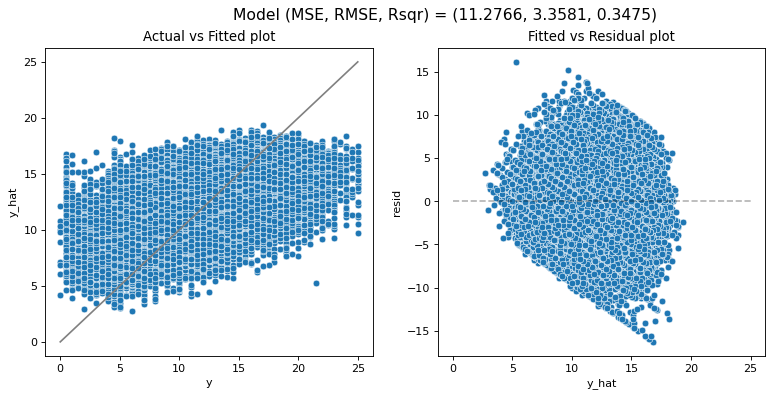

In [38]:
# Evaluate the model using the training data
train_metrics_s = model_fit(lm_s, X_train, y_train, plot = True)

In [39]:
# Evaluate the model using the testing data
test_metrics_s = model_fit(lm_s, X_test, y_test, plot = True)

Upon observation, it is evident that the model remains essentially unchanged from the baseline linear regression model, indicating that standardising the features did not significantly improve the model's predictive power. The residual plots exhibit similar patterns to those of the original model, indicating that the assumptions of linear regression are still not fully satisfied. Consequently, we will evaluate the performance of the linear model using transformed features. 


##### 3.3.3 Linear Regression with Transformed Features

In [40]:
# Make a pipeline to standardize the features and fit a linear regression model
lm_s_all = make_pipeline(
    StandardScaler(),
    LinearRegression()
).fit(X_train_all, y_train_all)

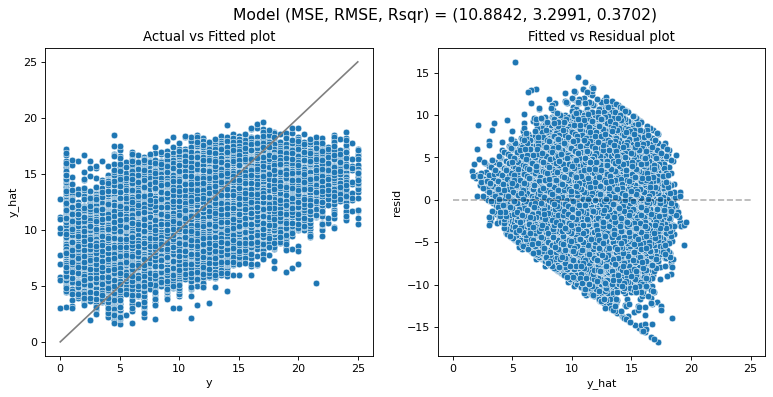

In [41]:
# Evaluate the model using the training data
train_metrics_s_all = model_fit(lm_s_all, X_train_all, y_train_all, plot = True)

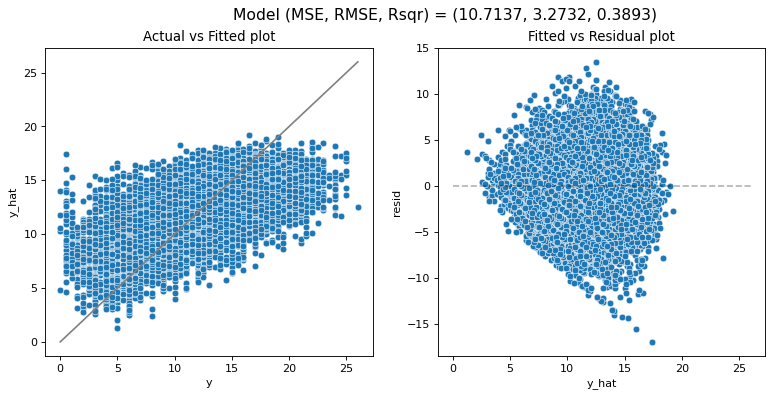

In [42]:
# Evaluate the model using the testing data
test_metrics_s_all = model_fit(lm_s_all, X_test_all, y_test_all, plot = True)

The model's performance improves slightly after incorporating the transformed features. The residual plots still exhibit patterns that suggest the model's assumptions are not fully satisfied. The $R^2$ values are relatively low (0.3702 for the training set and 0.3893 for the test set), indicating that the model only accounts for a limited portion of the variability in the outcome variable. The MSE and RMSE values are also similar to those of the original model. Consequently, we will explore more complex models and procedures in order to enhance the performance of the model, which may involve incorporating interaction terms, nonlinear transformations, or employing different types of models. 

### 3.4 Polynomial Regression

As seen in the previous sections, linear regression is ineffective in capturing the relationship between the original features and the target variable. Therefore, it is preferable to use polynomial regression as it allows us to represent the non-linear interactions between features and capture more complex relationships within the dataset. The model provides greater flexibility to efficiently incorporate curved data patterns, potentially leading to improved prediction accuracy of the model. Although it may enhance model performance by revealing hidden patterns, it must be handled carefully to avoid overfitting. To mitigate this, it's critical to use techniques involving cross-validation to determine the optimal degree for the polynomial features and to consider regularisation that penalise overly complex models.


##### 3.4.1 Searching for the Optimal Degree with GridSearchCV

We use GridSearchCV to find the optimal degree for the polynomial features, which is a method for tuning hyperparameters by cross-validation over a grid of values. K-fold cross-validation is applied to evaluate the performance of the model and select the degree that provides the best mean cross-validated negative mean squared error (MSE). Since the dataset is relatively large, we are only capable of testing degrees 1, 2, and 3.

In [43]:
# Create a pipeline with a polynomial feature transformer and a linear regression model
polyreg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('linear', LinearRegression())
])

# Define the hyperparameter grid
param_grid = {
    'poly__degree': [1, 2, 3] }

# Use K-fold cross-validation to find the optimal degree
kf = KFold(n_splits = 5, shuffle = True, random_state=42)

# Initialize the GridSearchCV object and fit it to the data
grid_search = GridSearchCV(polyreg_pipe, param_grid, cv = kf, scoring = 'neg_mean_squared_error', return_train_score=True).fit(X_train, y_train)

In [44]:
# Print the best degree found by GridSearchCV and the best mean cross-validated negative MSE
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score (negative MSE): {grid_search.best_score_}")

# Print the test score (negative MSE) of the best model
print(f"Test Score (negative MSE): {grid_search.score(X_test, y_test)}")

Best parameters: {'poly__degree': 2}
Best score (negative MSE): -10.95182992312899
Test Score (negative MSE): -10.818384997305973


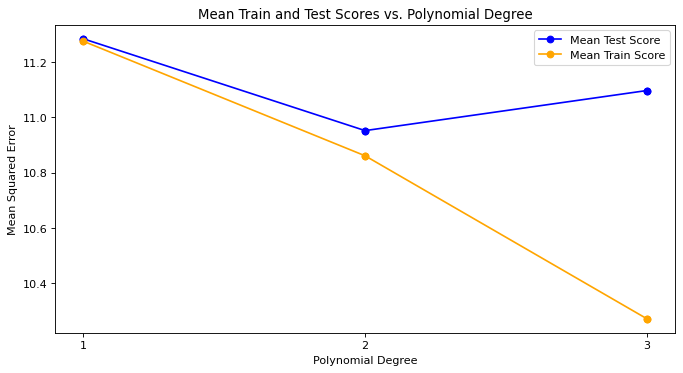

In [45]:
# Plot the CV scores for each degree
cv_results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 5))
plt.scatter(cv_results['param_poly__degree'], -cv_results['mean_test_score'], marker='o', color='blue')
plt.plot(cv_results['param_poly__degree'], -cv_results['mean_test_score'], label='Mean Test Score', marker='o', color='blue')
plt.scatter(cv_results['param_poly__degree'], -cv_results['mean_train_score'], marker='o', color='orange')
plt.plot(cv_results['param_poly__degree'], -cv_results['mean_train_score'], label='Mean Train Score', marker='o', color='orange')
plt.title('Mean Train and Test Scores vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.xticks(range(1, 4))
plt.legend()
plt.show()

The results from GridSearchCV show that a polynomial degree of 2 is best for the regression model, as it has the lowest cross-validation MSE. This shows that quadratic terms describe the structure of the data better than linear (degree 1) or cubic (degree 3) terms. While the mean training error decreases with polynomial degree, the mean test error is minimised at degree 2 and increases at degree 3, indicating overfitting for higher order polynomial regression. Therefore, we will fit a polynomial regression model with degree 2 to the training data and evaluate its performance on the testing data.

##### 3.4.2 Polynomial Regression with Degree 2

In [46]:
# Create a polynomial feature transformer with degree 2
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)

# Create a pipeline with the polynomial features and a linear regression model
poly_reg = make_pipeline(StandardScaler(), polynomial_features, LinearRegression())

# Fit the model on the training data
poly_reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

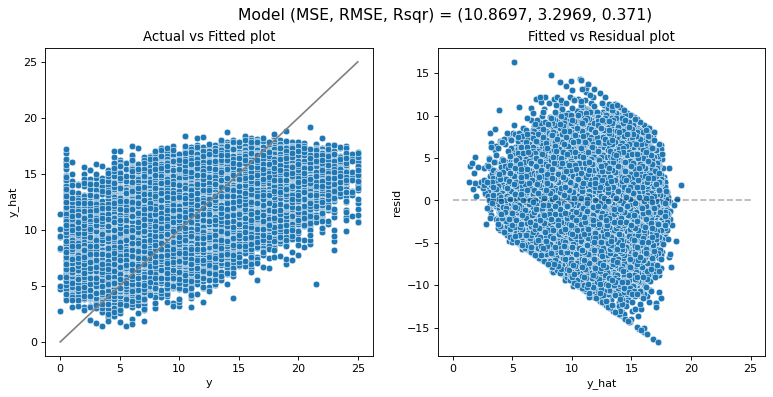

In [47]:
# Evaluate the model using the training data
train_metrics_poly = model_fit(poly_reg, X_train, y_train, plot = True)

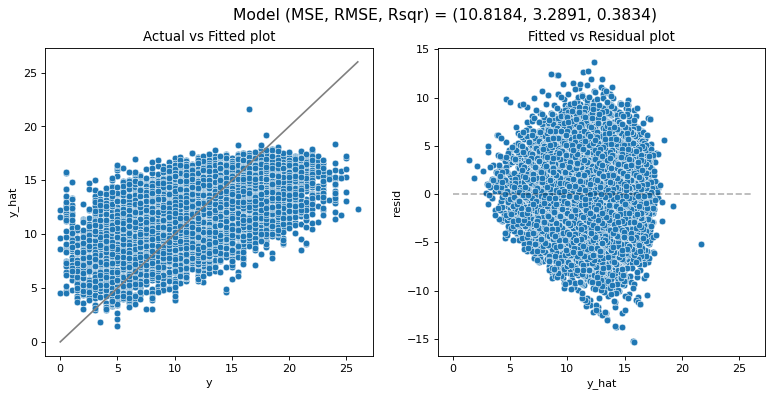

In [48]:
# Evaluate the model using the testing data
test_metrics_poly = model_fit(poly_reg, X_test, y_test, plot = True)

The polynomial regression model with degree 2 doesn't exhibit an improvement in performance compared to the linear regression model. Although the $R^2$ values are slightly higher (0.371 for the training set and 0.3834 for the test set), the residual plots doesn't show random distribution of data points around the horizontal axis at zero, and the predicted values are not close to the actual values. The model metrics (MSE and RMSE) are fairly similar for those of the linear regression model, indicating that the polynomial regression model with degree 2 doesn't provide more accurate predictions. Consequently, the polynomial regression model with degree 2 is not a better fit for the data compared to the linear regression model. Next, we will evaluate the performance of the polynomial regression model using the selected features.

##### 3.4.3 Polynomial Regression with Selected Features

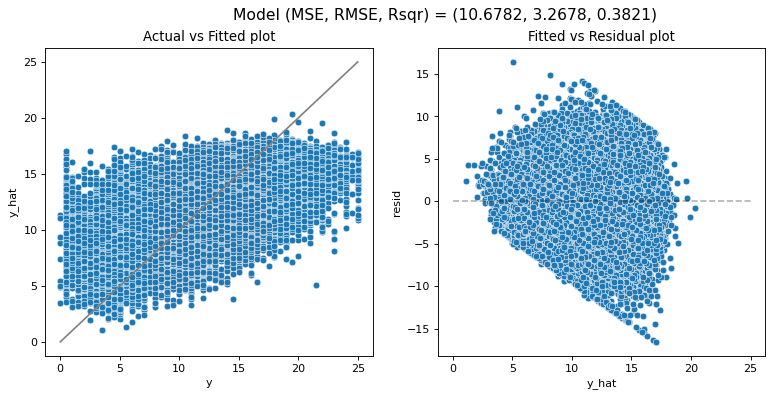

In [49]:
# Fit the model on the selected features
poly_reg_s = make_pipeline(StandardScaler(), polynomial_features, LinearRegression()).fit(X_train_s, y_train_s)

# Evaluate the model using the training data
train_metrics_poly_s = model_fit(poly_reg_s, X_train_s, y_train_s, plot = True)


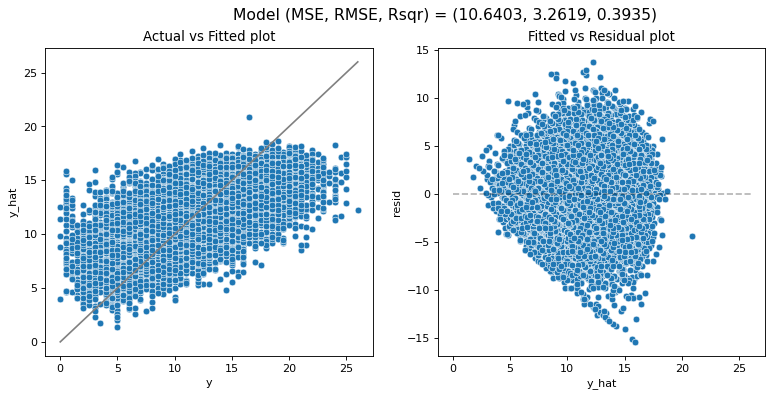

In [50]:
# Evaluate the model using the testing data
test_metrics_poly_s = model_fit(poly_reg_s, X_test_s, y_test_s, plot = True)

Compared to the baseline model, the second-degree polynomial regression model using selected features resulted in a slightly better MSE of approximately 10.64, an RMSE of 3.26 and a slightly higher $R^2$ value of 0.3935 for the test set. This indicates that the polynomial model with selected features performs slightly better than the baseline linear regression model in terms of MSE and RMSE and has a higher R-squared value, suggesting that it explains a greater proportion of the variance in the dependent variable.

The Actual vs. Fitted plots for both models show that the predictions of the polynomial model are slightly closer to the line of perfect fit, especially for higher values of the target variable, implying better prediction accuracy for larger outcomes. The Fitted vs. Residual plots show the pattern of spread in the residuals as the fitted value increases, hinting at potential heteroscedasticity, but the polynomial model with selected features appears to have a more compact cloud, suggesting more consistent prediction errors across the range of predictions. 

Overall, the degree 2 polynomial regression model on the selected features provides an incremental improvement over the baseline linear regression model with the full set of features, both in terms of fit and predictive power. However, the improvement is modest, suggesting that we are still in the underfitting regime and that further model tuning or exploration of more sophisticated modelling techniques may yield more significant improvements.

### 3.5 Regularization 

To fit data using Ridge Regression for predicting cogscore, we leverage the regularization technique to manage multicollinearity and prevent overfitting. Ridge Regression, a type of linear regression, introduces a penalty term (alpha) to the loss function, shrinking the coefficients for less important predictors. In this case, predictors include `isced1997_r`, `eduyears_mod`, `age`, `casp`, and `bmi`, offering a robust model for cognitive score prediction by balancing bias and variance.


In [51]:
def get_coefs(m):
    """Returns the model coefficients from a Scikit-learn model object as an array,
    includes the intercept if available.
    """
    
    # If pipeline, use the last step as the model
    if (isinstance(m, sklearn.pipeline.Pipeline)):
        m = m.steps[-1][1]
    
    
    if m.intercept_ is None:
        return m.coef_
    
    return np.concatenate([[m.intercept_], m.coef_])

In [52]:
# Basing on 'Feature Engineer' part, here we select feature following features to discuss: `age`, `isced1997`, `bmi`, `casp`, `eduyears_mod`
df_duplicate = df.copy()
X = df_duplicate.drop('cogscore', axis=1)  # Features
X = X[['isced1997_r','eduyears_mod','age','casp','bmi']]

scaler = StandardScaler()

columns_to_scale = ['age', 'bmi', 'eduyears_mod', 'casp']

# Standarize the choosen features
df_duplicate[columns_to_scale] = scaler.fit_transform(df_duplicate[columns_to_scale])

y = df_duplicate['cogscore']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
alphas = np.logspace(-2, 3, num=200) # from 10^-2 to 10^3

ws = [] # Store coefficients
mses_train = [] # Store training mses
mses_test = [] # Store test mses

for a in alphas:
    m = make_pipeline(
        StandardScaler(),
        Ridge(alpha=a)
    ).fit(X_train, y_train)
    
    ws.append(m[1].coef_) 
    mses_train.append(mean_squared_error(y_train, m.predict(X_train)))
    mses_test.append(mean_squared_error(y_test, m.predict(X_test)))

# Create a data frame for plotting
sol_path = pd.DataFrame(
    data = ws,
    columns = X_train.columns # Label columns w/ feature names
).assign(
    alpha = alphas,
).melt(
    id_vars = ('alpha')
)

mses_path = pd.DataFrame(
    {'alpha': alphas, 'Train': np.asarray(mses_train), 'Test': np.asarray(mses_test)}).melt(
    id_vars = ('alpha')
)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot Ridge Coefficients
sns.lineplot(x='alpha', y='value', hue='variable', data=sol_path, ax=axs[0])
axs[0].set_title("Ridge Coefficients")
axs[0].set_xscale('log')

# Plot MSEs
sns.lineplot(x='alpha', y='value', hue='variable', data=mses_path, ax=axs[1])
axs[1].set_title("MSE by Alpha")
axs[1].set_ylabel("MSE")
axs[1].set_xscale('log')
plt.tight_layout()

- It is noticeable that the coefficient for `isced1997_r` remains stable and close to 1 regardless of the alpha value. This indicates that the variable `isced1997_r` is a strong predictor in the model, and its coefficient is relatively insensitive to the regularization.
- Similarly, "eduyears_mod" and "age" have coefficients that are stable but much smaller in magnitude, suggesting they are also consistent predictors but with less influence than `isced1997_r`.
- The coefficients for `bmi` is almost zero across all values of alpha, suggesting it has little to no predictive power in the presence of the regularization penalty, or it could be highly correlated with other variables.
- There are no coefficients crossing the zero line, which indicates no sign change for any variable coefficient as alpha increases.

The behavior of the coefficient paths indicates that the model doesn't depend on nonlinear regression term. The behavior of this model is not better than the baseline linear model. We need to do further feature engineering if we want to use ridge regression to conduct machine learning.

In [54]:
# create poly feature
poly = PolynomialFeatures(degree=2, include_bias=True)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# feature transformation
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_poly_train)
X_scaled_test = scaler.transform(X_poly_test)

# feature selection
selector = RFE(Lasso(alpha=0.001), n_features_to_select=10, step=1)
X_reduced_train = selector.fit_transform(X_scaled_train, y_train)
X_reduced_test = selector.transform(X_scaled_test)


alphas = np.logspace(0, 5, num=200) # from 10^-2 to 10^3

ws = [] # Store coefficients
mses_train = [] # Store training mses
mses_test = [] # Store test mses

for a in alphas:
    m = make_pipeline(
        StandardScaler(),
        Ridge(alpha=a)
    ).fit(X_reduced_train, y_train)
    
    ws.append(m[1].coef_) 
    mses_train.append(mean_squared_error(y_train, m.predict(X_reduced_train)))
    mses_test.append(mean_squared_error(y_test, m.predict(X_reduced_test)))

selected_features1 = [f"feature{i}" for i in range(X_reduced_train.shape[1])]

# Create a data frame for plotting
sol_path = pd.DataFrame(
    data = ws,
    columns = selected_features1 # Label columns w/ feature names
).assign(
    alpha = alphas,
).melt(
    id_vars = ('alpha')
)

mses_path = pd.DataFrame(
    {'alpha': alphas, 'Train': np.asarray(mses_train), 'Test': np.asarray(mses_test)}).melt(
    id_vars = ('alpha')
)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot Ridge Coefficients
sns.lineplot(x='alpha', y='value', hue='variable', data=sol_path, ax=axs[0])
axs[0].set_title("Ridge Coefficients")
axs[0].set_xscale('log')

# Plot MSEs
sns.lineplot(x='alpha', y='value', hue='variable', data=mses_path, ax=axs[1])
axs[1].set_title("MSE by Alpha")
axs[1].set_ylabel("MSE")
axs[1].set_xscale('log')

**Left Plot: Ridge Coefficients**
- The x-axis is on a logarithmic scale representing the regularization parameter, `alpha`, ranging from $10^0$ to $10^5$.
- The y-axis shows the value of the coefficients for different features in the model.
- Each colored line corresponds to a coefficient path for one of the features as `alpha` increases.
- The coefficients generally shrink towards zero as `alpha` increases due to the regularization effect of ridge regression, which penalizes large coefficient values to prevent overfitting.
- Most feature coefficients approach zero as `alpha` gets large. Some feature coefficients, like those for `feature2` and `feature5`, first increase and then decrease with higher `alpha` values, indicating that the relationship between these features and the target variable may vary with the strength of regularization.

**Right Plot: MSE by Alpha**
- The x-axis is also logarithmic, matching the range of the left plot.
- The y-axis measures the Mean Squared Error (MSE), a metric for the accuracy of the model's predictions.
- The blue line indicates MSE on the training set, while the orange line represents MSE on the test set.
- As `alpha` increases, both training and test MSE initially decrease to a minimum value before starting to rise. This indicates an optimal level of regularization where the test MSE is at its lowest, which seems to be between $10^1$ and $10^2$ for this dataset.
- The right plot clearly shows signs of overfitting when `alpha` is too small (below the optimal value) and underfitting when `alpha` is too large.

Together, these plots provide valuable insights for selecting an appropriate `alpha` value that balances model complexity and predictive performance. However, same as the previous attempt, the behavior of the coefficient paths indicates that the model doesn't depend on nonlinear regression term and the behavior of this model is not better than the baseline linear model.

### 3.6 Classification Model

Data shows that, with population aging, dementia in the European population over 55 years old is a significant public health issue. To address the dementia prevalence across different age groups, we will divide the dataset into subsets labeled by age groups. Additionally, in Europe, the prevalence of dementia in the population over 55 increases with age. According to data from Alzheimer Europe, the prevalence rates for dementia by age group are as follows: 0.6% for `60-64` years old, 1.3% for 65-69 years old, 3.3% for `70-74` years old, 8% for `75-79` years old, 12.1% for `80-84` years old, 21.9% for `85-89` years old, and 40.8% for those `over 90`【[source](https://www.alzheimer-europe.org/dementia/prevalence-dementia-europe?language_content_entity=en)】. Additionally, a systematic review and meta-analysis of 9 studies conducted in Europe between 1993 and 2018 shows that, after adjusting for age and sex, the average prevalence rate of dementia was 7.1%【[source](https://pubmed.ncbi.nlm.nih.gov/30412486/)】.

In [55]:
df.head()

int_year  wave  country  country_mod  female        age  birth_country  \
0    2011.0   4.0     11.0         40.0     1.0  59.700001           40.0   
1    2011.0   4.0     11.0         40.0     1.0  72.599998          528.0   
2    2011.0   4.0     11.0         40.0     1.0  59.599998           40.0   
3    2011.0   4.0     11.0         40.0     0.0  59.799999           40.0   
4    2004.0   1.0     11.0         40.0     1.0  61.299999           40.0   

   citizenship  isced1997_r  eduyears_mod  ...  country_35.0  country_47.0  \
0         40.0          5.0           3.0  ...             0             0   
1        528.0          5.0          15.0  ...             0             0   
2         40.0          3.0          11.0  ...             0             0   
3         40.0          4.0          13.0  ...             0             0   
4         40.0          3.0          12.0  ...             0             0   

   country_48.0  country_51.0  country_53.0  country_55.0  country_57.0  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   country_59.0  country_61.0  country_63.0  
0             0             0             0  
1             0             0             0  
2             0             0             0  
3             0             0             0  
4             0             0             0  

[5 rows x 58 columns]

In [56]:
df_subset.head()

int_year  wave  country  country_mod  female        age  birth_country  \
0    2011.0   4.0     11.0         40.0     1.0  59.700001           40.0   
1    2011.0   4.0     11.0         40.0     1.0  72.599998          528.0   
2    2011.0   4.0     11.0         40.0     1.0  59.599998           40.0   
3    2011.0   4.0     11.0         40.0     0.0  59.799999           40.0   
4    2004.0   1.0     11.0         40.0     1.0  61.299999           40.0   

   citizenship  isced1997_r  eduyears_mod  ...  bmi2  smoking  ever_smoked  \
0         40.0          5.0           3.0  ...   2.0      5.0          5.0   
1        528.0          5.0          15.0  ...   3.0      1.0          1.0   
2         40.0          3.0          11.0  ...   2.0      5.0          1.0   
3         40.0          4.0          13.0  ...   2.0      1.0          1.0   
4         40.0          3.0          12.0  ...   2.0      5.0          1.0   

   br010_mod  br015_  casp  chronic_mod  sp008_  ch001_  cogscore  
0        5.0     1.0  44.0          1.0     5.0     2.0       8.0  
1        2.0     1.0  35.0          6.0     1.0     0.0      14.5  
2        7.0     2.0  43.0          1.0     5.0     6.0      18.5  
3        7.0     3.0  47.0          1.0     3.0     6.0      24.0  
4        4.0     3.0  43.0          0.0     5.0     2.0      20.0  

[5 rows x 22 columns]

In [61]:
df_subset = df.iloc[:, :22].copy()

# Define age segments and corresponding dementia rates
bins = [0, 59, 64, 69, 74, 79, 84, 89, float('inf')]
labels = ['55-59','59-64', '64-69', '69-74', '74-79', '79-84', '84-89', '89+']
dementia_rates = [0.3, 0.6, 1.3, 3.3, 8.0, 12.1, 21.9, 40.8]  # Dementia rates for each age group

# Create a new column for age grouping
df_subset.loc[:,'age_group'] = pd.cut(df_subset['age'], bins=bins, labels=labels, right=False)

# Obtain subsets for each age group
age_groups = {}
for label in labels:
    age_groups[label] = df_subset[df_subset['age_group'] == label]

n_groups = len(age_groups)
n_cols = 4  # Assuming 4 histograms per row
n_rows = n_groups // n_cols + (1 if n_groups % n_cols > 0 else 0)

plt.figure(figsize=(15, 3 * n_rows))

for i, (label, group_df) in enumerate(age_groups.items(), 1):
    plt.subplot(n_rows, n_cols, i)
    counts, bins, patches = plt.hist(group_df['cogscore'], bins=20, edgecolor='black')
    
    # Calculate cumulative frequency percentage
    cumulative_frequency = np.cumsum(counts) / sum(counts) * 100
    # Find the cogscore corresponding to the given rate of dementia
    rate = dementia_rates[min(i-1, len(dementia_rates)-1)]  # Ensure index doesn't go out of bounds
    rate_index = np.where(cumulative_frequency >= rate)[0][0]  # Find the first index that exceeds the given rate
    cogscore_at_rate = (bins[rate_index] + bins[rate_index + 1]) / 2  # Calculate the corresponding cogscore
    susceptible_at_rate = cogscore_at_rate * 1.5

    plt.axvline(x=cogscore_at_rate, color='r', linestyle='--', label=f'Dementia Rate: {rate}%')

    plt.axvline(x=susceptible_at_rate, color='b', linestyle='--', label=f'Susceptible Rate: {rate}%')
    # Annotate cogscore value above the red line
    plt.text(cogscore_at_rate, plt.ylim()[1]*1.07, f'x={cogscore_at_rate:.2f}', color='red', ha='center')
    
    plt.text(susceptible_at_rate, plt.ylim()[1]*1.005, f'x\'={susceptible_at_rate:.2f}', color='blue', ha='center')
    
    plt.title(f'Age Group {label}', pad = 15)
    plt.xlabel('CogScore')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show() 


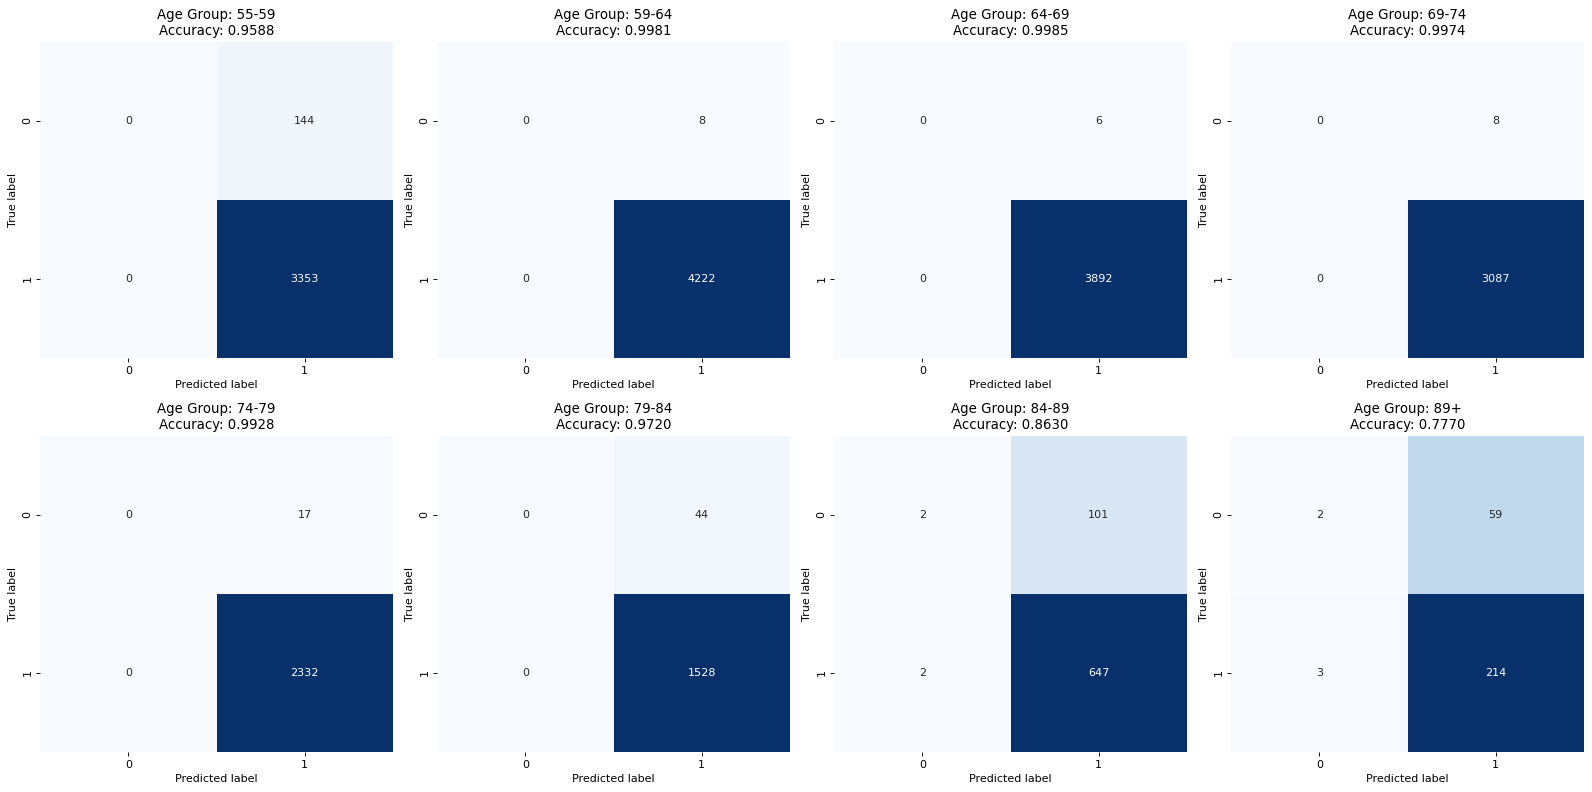

In [62]:
# Function: Draw a confusion matrix
def plot_confusion_matrix(ax, cm, classes, title='Confusion matrix'):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

# Initialize a 2x4 subplot layout
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Process each age group, train SVM model, and plot subplot
for i, (label, group_df) in enumerate(age_groups.items()):
    if i >= 8:  # Stop plotting if more than 8 subplots
        break
    
    # Split into two categories based on cogscore_at_rate
    rate = dementia_rates[min(i, len(dementia_rates)-1)]
    
    # Calculate cumulative frequency percentage
    cumulative_frequency = np.cumsum(counts) / sum(counts) * 100
    # Find the cogscore corresponding to the given rate of dementia
    rate = dementia_rates[min(i-1, len(dementia_rates)-1)]  # Ensure index doesn't go out of bounds
    rate_index = np.where(cumulative_frequency >= rate)[0][0]  # Find the first index that exceeds the given rate
    cogscore_at_rate = (bins[rate_index] + bins[rate_index + 1]) / 2  # Calculate the corresponding cogscore

    df_copy = group_df.copy()
    df_copy.loc[:, 'class'] = (df_copy['cogscore'] >= cogscore_at_rate).astype(int)
    df_copy.describe()
    X = df_copy.drop(['cogscore', 'class','age_group'], axis=1)  # Assume 'class' is the target column
    y = df_copy['class']  # Target data
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    # Train SVM model
    clf = svm.SVC(kernel='linear')
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    ax = axes[i//4, i%4]  # Determine the current subplot's position
    cm = confusion_matrix(y_test, y_pred)  # Obtain confusion matrix
    # Plot the confusion matrix on the specified subplot axis
    plot_confusion_matrix(ax, cm, classes=np.unique(y_test), title=f'Age Group: {label}\nAccuracy: {accuracy:.4f}')

# Adjust layout to prevent overlapping between subplots
plt.tight_layout()
plt.show()


Analyzing the model evaluation output for different age groups from "55-59" to "89+", several patterns and key points emerge:

1. **High Accuracy with Imbalanced Data**: Across all age groups, the accuracy scores are relatively high, ranging from 77.34% to 99.84%. However, the confusion matrices reveal a significant imbalance in the dataset, with the majority of instances belonging to class 1. This imbalance heavily influences the accuracy metric, making it less reliable for assessing model performance.

2. **Class 0 Underrepresented**: For each age group, class 0 is substantially underrepresented compared to class 1. In many cases, there are zero true positives (TP) for class 0, indicating the model's inability to correctly identify instances of this class. This is further evidenced by the recall for class 0 being 0.00 across most groups, meaning the model failed to correctly identify any true class 0 instances as such.

3. **Precision and Recall**: The precision for class 0 is consistently low or undefined (leading to modifications in the code to handle division by zero), reflecting the model's tendency to misclassify class 0 instances as class 1. The recall for class 1 is very high or perfect (1.00) in all groups, which, while initially seeming positive, actually underscores the model's bias towards predicting the majority class.

4. **F1-Score Analysis**: The F1-scores for class 0 are extremely low or 0.00, indicating poor model performance for this class. Conversely, F1-scores for class 1 are high, mirroring the precision and recall patterns. The weighted averages of F1-scores are skewed towards the performance on class 1 due to the class imbalance.

5. **Model Bias**: The consistent model behavior across age groups suggests a strong bias towards predicting instances as belonging to class 1. This could be due to the class imbalance within the training data, where the model has "learned" that predicting class 1 is usually correct and thus generalizes this strategy to unseen data.

Given the unsatisfactory performance of the SVM classification model, the primary reason identified is the lack of comprehensiveness in the model data. To address this issue and enhance the model's accuracy, we will employ a manual classification approach.

In [63]:
X_selected = df[selected_festures]  # Features
y = df['cogscore']  # Target

def label_cogscore_ranges(score):
    if score <= 9:
        return 0
    elif score <= 12:
        return 1
    elif score <= 15:
        return 2
    else:
        return 3

# Apply the function to create a new column with labels based on the specified ranges
df['cogscore_range_label'] = df['cogscore'].apply(label_cogscore_ranges)

# Prepare data for model fitting with the new range-based labels
y_range_label = df['cogscore_range_label']

# Split the data into training and test sets with the new labels
X_train_range, X_test_range, y_train_range, y_test_range = train_test_split(X_selected, y_range_label, test_size=0.3, random_state=42)

# Initialize and train the RandomForestClassifier with range-based labels
clf_range = RandomForestClassifier(n_estimators=100, random_state=42)
clf_range.fit(X_train_range, y_train_range)

# Predict on the test set with range-based labels
y_pred_range = clf_range.predict(X_test_range)

# Calculate the accuracy with range-based labels
accuracy_range = accuracy_score(y_test_range, y_pred_range)

print("accuracy rate:",accuracy_range)


# Calculate the confusion matrix
cm_range = confusion_matrix(y_test_range, y_pred_range)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm_range)

# Generate a classification report
report_range = classification_report(y_test_range, y_pred_range)

# Display the classification report
print("\nClassification Report:")
print(report_range)

accuracy rate: 0.4407727503812913
Confusion Matrix:
[[4960 1453 1062  306]
 [2335 2244 2069  973]
 [1142 1802 2880 2013]
 [ 350  805 2190 2921]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.64      0.60      7781
           1       0.36      0.29      0.32      7621
           2       0.35      0.37      0.36      7837
           3       0.47      0.47      0.47      6266

    accuracy                           0.44     29505
   macro avg       0.44      0.44      0.44     29505
weighted avg       0.43      0.44      0.44     29505



# Discussion & Conclusions

### Discussion

### Conclusion

In concluding our investigation into the predictive modeling of cognitive scores using data from the SHARE dataset, we embarked on a comprehensive journey beginning with exploratory data analysis and feature engineering. We addressed the challenge of incomplete data by employing KNN imputation to fill in missing values, ensuring a robust dataset for analysis. Our correlation analysis shed light on the relationships between variables, setting a solid foundation for subsequent analytical steps.

During the feature engineering phase, we applied a log transformation to certain features to normalize their distributions, enhancing model interpretability and performance. Additionally, OneHotEncoding was applied to the `country` variable, incorporating it into our feature set and reflecting the diverse geographical context of the study participants. This meticulous preparation of the dataset facilitated its division into training and test sets, allowing us to proceed with the critical task of finding the best features for predicting cognitive scores, alongside employing PCA analysis to reduce dimensionality and focus on the most informative attributes.

In the model fitting and adjustment phase, we initiated our efforts with a Regression Assumption Test, ensuring that our models were built on solid assumptions. Our exploration through Linear regression revealed that, despite incorporating transformed features, the model's performance was modest, with $R^2$ values of 0.3702 and 0.3893 for the training and test sets, respectively. The venture into Polynomial regression showed a notable improvement in performance, particularly with a second-order polynomial regression model, which demonstrated higher $R^2$ values (0.371 for the training set and 0.3834 for the test set), signifying a better fit. However, Ridge regression did not yield the anticipated improvement, suggesting the complexity of capturing cognitive score predictors with linear models.

Our most insightful discovery came from categorizing cogscore by numerical value and fitting classification models, which proved to be the most effective approach. This analysis illuminated several risk factors for dementia, highlighting the intricate interplay between various predictors and the condition's onset.

Ultimately, our study underscores the multifaceted nature of dementia risk factors and the critical importance of innovative analytical techniques in understanding and predicting cognitive health outcomes. While our models have provided valuable insights, they also reflect the challenges inherent in modeling complex human health conditions and underscore the need for continued research in this vital area of public health.

# References

<div class="csl-bib-body" style="line-height: 2; margin-left: 2em; text-indent:-2em;">
  <div class="csl-entry">
    1. Livingston, Gill, <i>et al</i>. "Dementia Prevention, Intervention, and Care."<br><i>The Lancet</i>, vol. 390, no. 10113, December 2017, pp. 2673–734.<br><i>DOI.org (Crossref)</i>, 
    https://doi.org/10.1016/S0140-6736(17)31363-6.
  </div>
</div>

<div class="csl-bib-body" style="line-height: 2; margin-left: 2em; text-indent:-2em;">
  <div class="csl-entry">
    2. Livingston, Gill, <i>et al</i>. "Dementia Prevention, Intervention, and Care: 2020 Report of the Lancet Commission."<br>
    <i>The Lancet</i>, vol. 396, no. 10248, August 2020, pp. 413–46.<br><i>DOI.org (Crossref)</i>, 
    .
  </div>
</div>

<div class="csl-bib-body" style="line-height: 2; margin-left: 2em; text-indent:-2em;">
  <div class="csl-entry">
    3. Prevalence of Dementia in Europe. <i>www.alzheimer-europe.org</i>, 
    . Accessed 9 Mar. 2024.
  </div>
</div>

<div class="csl-bib-body" style="line-height: 2; margin-left: 2em; text-indent:-2em;">
  <div class="csl-entry">
    4. Bacigalupo, Ilaria, <i>et al</i>.
     “A Systematic Review and Meta-Analysis on the Prevalence of Dementia in Europe: Estimates from the Highest-Quality Studies Adopting the DSM IV Diagnostic Criteria.” <br>
     <i>Journal of Alzheimer’s Disease: JAD</i>, vol. 66, no. 4, 2018, pp. 1471–81. <i>PubMed</i>, 
    .
  </div>
</div>

<div class="csl-bib-body" style="line-height: 2; margin-left: 2em; text-indent:-2em;">
  <div class="csl-entry">
    5. Börsch-Supan, A. & S. Gruber (2022): easySHARE. Release version: 8.0.0. SHARE-ERIC. Dataset. <i>doi:</i> 
    .
  </div>
</div>

In [60]:
# # Run the following to render to PDF
# !jupyter nbconvert --to pdf project1.ipynb